<a href="https://colab.research.google.com/github/ttrangia/ttrangia.github.io/blob/main/Project_Notebook_LEGALST_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LEGAL Studies 123: Project Notebook

By Jaqueline Verduzco, Nabiha Hasan, and Tino Trangia

## Question

### Our Research Question and Chosen Datasets

Our research topic explores how policy can affect the issue of (affordable) housing availability. Specifically, our group will explore how the CA housing policy SB-9 affected the creation of new housing (i.e. the extent to which SB-9 is associated with an increase in housing developments). We will measure the creation of new housing by looking at a dataset that tracks the creation of new permits in CA from 2018 to 2022.

### About SB-9
California Senate Bill 9, also known as the HOME Act, came into effect on January 1st, 2021. The bill streamlines the process of subdividing lots and creating duplexes, thus turning a single-family residence into up to four residences. In theory, this should lead to an increase in housing permits for 2-4 plex developments and allow the creation of more affordable housing in cities where single-family zoning has prevented additional construction. Given California's high home and rent prices, it is crucial that the supply of affordable housing be increased to meet demand. Current indicators, however, suggest that the bill may not have had a significant impact. Our project will supplement existing analysis of the bill and further investigate its effectiveness.

Readings:
* [Official information from CA Legislature](https://leginfo.legislature.ca.gov/faces/billNavClient.xhtml?bill_id=202120220SB9)
* [Concise overview from CA Senate Democratic Caucus](https://focus.senate.ca.gov/sb9)
* [UC Berkeley Terner Center Report](https://ternercenter.berkeley.edu/research-and-policy/sb-9-turns-one-applications/)
* [Legal Analyst's Office Report on Housing Shortage](https://lao.ca.gov/reports/2015/finance/housing-costs/housing-costs.aspx)


### Why this matters

This investigation and analysis is important because we want to see how policy can help to solve issues like the California housing crisis. Housing in California is a scarce resource, with many people being priced out of their homes or forced to commute long distances to their place of work. By adding policies such as SB-9, policy makers hoped to expand housing availability and directly adress the housing crises, but it is important to question: do policies like these actually work?

It is important to explore the effects of policies such as SB-9; if they were effective, policy makers can take from what worked best and perhaps even expand on the solutions. If the policy was ineffective, policy makers can explore what went wrong and improve on their work.

From our analysis, we found that SB-9 did not have a significant impact on permit creation (which in turn could mean housing creation). Such results should indicate to policy makers that there might have been too many roadblocks or inconveniences for Calfornia residents to actually use SB-9. Whatever the reason, exploring the efficacy of potential solutions to the housing crisis is extremeley important.

## Exploratory Data Analysis

### Importing Packages

In [ ]:
!pip install CensusData
!pip install us
!pip install geopandas
!pip install census
!pip install CensusData
!pip install census-geocoder
!pip install validator-collection
!pip install backoff-utils
!pip install --upgrade geopy
!pip install plotly-geo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for CensusData: filename=CensusData-1.15.post1-py3-none-any.whl size=28205746 sha256=338b2fc59f86b2795039e2ab0cd4e47d71aad6922396adbe52eecb2ce7dac57f
  Stored in directory: /root/.cache/pip/wheels/40/0a/09/c996fa9cc686a1efb90426ce5fbaac1e2e0d7e0efbb3939a85
Successfully built CensusData
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11941 sha256=ead815a814f4caa6d54641a5356dc771c6b9dfbdb25f523fd5405c262252f431
  Stored in directory: /root/.cache/pip/wheels/b0/2a/8b/46c38c4bc2d65459

In [ ]:
import pandas as pd
# Import any data cleaning libraries here
import sklearn as sk
from shapely.geometry import Point
from shapely import wkt
# Import your selected models here

# Import any other libraries here
import numpy as np
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from census import Census
from us import states
import os
import censusdata
import json
import requests
import os
import io
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import re
import geopandas as gpd
from datetime import datetime
from folium import plugins
from folium.plugins import Draw
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from branca.colormap import linear
import branca.colormap
from folium.plugins import TimestampedGeoJson
from folium.plugins import TimeSliderChoropleth
from matplotlib.dates import YearLocator, DateFormatter

### Control Variables
We will explore input variables that we believe also account for the creation of new housing (and therefore new housing permits). These input variables include:


* Interest Rates (for US over time)
* Housing Prices in CA
* California Construction Cost Index
* Consumer Sentiment
* People of Color present in a geographic area (county)
* Proportion of Rent Burdened Households
* Rental Vacancy Rates
* Median Household Income in a geographic area

### Ethical Data Collection
All of our data was acquired through publicly available sources. The California Open Data Portal does not contain private or confidential data about individuals and is collected through routine state business. The American Community Survey (ACS) is regulated by [privacy and data stewardship policies](https://www.census.gov/about/policies/privacy.html). Our other datasets (interest rates, housing market, construction cost, and consumer sentiment) provide aggregate statistics that are not beholden to privacy concerns. It should be noted that privacy is not the only ethical concern when obtaining and using data (sampling bias, informed consent, etc. are also importan), however we have found no indications of signfiicant ethical issues pertaining to these datasets.

### About our Datasets

#### 1. [County Boundary Geography](https://earthworks.stanford.edu/catalog/ark28722-s77p41)
As the housing permit data is identified by jursidiction (which is often city, but can be county as well) and county, we chose to analyze data at the granularity of the county level. We used a .json file of the county boundaries by the California Department of Forestry and Fire Protection, accessed through the Stanford library.

#### 2. [Housing Element Annual Progress Report](https://data.ca.gov/dataset/housing-element-annual-progress-report-apr-data-by-jurisdiction-and-year)

This dataset, created by the California Department of Housing and Community Development (accessed via California Open Data Portal), contains records of housing development applications from each local jurisdiciton (city or county) in the state, dating from 2018 to 2022. The number of permits in each county will be used as the dependent variable in our data analysis and modelling. Other attributes in the dataset may also be useful, such as the type of housing development.

*A summary of some of the variables in the dataset.*

Location variables such as:


*   Jurisdiction Name (JURS_NAME)
*   County Name (CNTY_NAME)
* Street Address
* Jurisdiction Tracking ID

Some identification variables (specific to each permit):

* APN (assessor parcel number)
* PRIOR_APN
* Project Name

And some helpful information about the type of housing created:

* Unit Category (such as 'Single-Family Detached Unit', 'Mobile Home Unit', 'Single-Family Attached Unit', 'Accessory Dwelling Unit', '2-, 3-, and 4-Plex Units per Structure', or '5 or More Units Per Structure)
* Whether the housing will have units that are affordable for: low, middle or high income individuals

#### 3. [Interest Rates](https://fred.stlouisfed.org/series/MORTGAGE30US)
Housing demand, and by extension housing development, is tied to economic factors, including interest rates. To account for the state of the economy in our models, we will use data from the Federal Reserve Bank of St.Louis. In this EDA, we examined the 15 and 30 year fixed rate mortgage averages in the US.

#### 4. [Housing Prices](https://www.zillow.com/research/data/)
In order to control for the effect of housing market demand on the quantity of new housing development, we included housing value estimates from the Zillow Home Value Index in our analysis. This index measures typical home values within different geogrpahic regions, including at the county level. The index is calculated as a weighted average of the middle 1/3 of house prices in a region (not to be conflated with the median house price).

#### 5. [California Construction Cost Index](https://www.dgs.ca.gov/RESD/Resources/Page-Content/Real-Estate-Services-Division-Resources-List-Folder/DGS-California-Construction-Cost-Index-CCCI)

Dataset from the California Real Estate Services Division that contains a measure of the cost of building construction in the state by year. The measure is derived from the [Engineering News Record Construction Cost Index](https://www.enr.com/economics). It accounts for labor and material costs. We included this variable in order to control for the effect of construction cost on new housing development.


#### 6. [Consumer Sentiment Index](https://fred.stlouisfed.org/series/UMCSENT#0)
The Consumer Sentiment Index, developed by the University of Michigan and accessed from the Federal Reserve Bank of St.Louis, is an economic indicator that is based on survey data. It seeks to capture public outlook on the economy, i.e. how confident consumers are in the economy. Higher levels of confidence is tied to higher spending and can affect housing demand.

### 7. [American Community Survey](https://www.census.gov/programs-surveys/acs)
We will be using statistics variables from the American Community Survey (ACS), such as the poverty rate of each county over time. Specifically, we are accessing ACS 5-year estimates using the Python Census API. These statistics will allow us to account for reginal differences in demographics in our model.

### Importing Datasets

#### County Boundaries

In [ ]:
import urllib.request
import zipfile
import geopandas as gpd
import json

# Set the file path for your GeoJSON file
file_path = 'https://earthworks.stanford.edu/download/file/ark28722-s77p41-geojson.json'
url_open = urllib.request.urlopen(file_path)

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(url_open)
gdf.head()

,id,NAME_PCASE,NAME_UCASE,FMNAME_PC,FMNAME_UC,ABBREV,NUM,ABCODE,ANSI,Shape_Leng,Shape_Area,geometry
0,s77p41.1,Siskiyou,SISKIYOU,Siskiyou County,SISKIYOU COUNTY,SIS,47,c047,093,672205.907573,1.643940e+10,"MULTIPOLYGON (((-121.44597 41.18390, -121.4623..."
1,s77p41.2,Del Norte,DEL NORTE,Del Norte County,DEL NORTE COUNTY,DNT,8,c008,015,314234.542738,2.626276e+09,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933..."
2,s77p41.3,Modoc,MODOC,Modoc County,MODOC COUNTY,MOD,25,c025,049,423574.415010,1.088488e+10,"MULTIPOLYGON (((-121.44784 41.99739, -121.4232..."
3,s77p41.4,Trinity,TRINITY,Trinity County,TRINITY COUNTY,TRI,53,c053,105,611269.176825,8.307254e+09,"MULTIPOLYGON (((-122.66795 40.77637, -122.6681..."
4,s77p41.5,Shasta,SHASTA,Shasta County,SHASTA COUNTY,SHA,45,c045,089,537564.913338,9.976444e+09,"MULTIPOLYGON (((-122.17328 40.37906, -122.1735..."


#### [Housing Element Annual Progress Report](https://data.ca.gov/dataset/housing-element-annual-progress-report-apr-data-by-jurisdiction-and-year)

In [ ]:
# Retreived from public CA data website, table is also called APR
url = "https://data.ca.gov/dataset/81b0841f-2802-403e-b48e-2ef4b751f77c/resource/c78b769d-cc02-4050-91ef-79ded665b5a8/download/table-a-housing-development-applications-submitted.csv"
r = requests.get(url)
bp = pd.read_csv(io.StringIO(r.text))
bp.head()

<ipython-input-5-8cb046612c31>:4: DtypeWarning: Columns (4,6,25) have mixed types. Specify dtype option on import or set low_memory=False.
  bp = pd.read_csv(io.StringIO(r.text))


,JURS_NAME,CNTY_NAME,YEAR,APN,PRIOR_APN,STREET_ADDRESS,PROJECT_NAME,JURS_TRACKING_ID,UNIT_CAT,TENURE,...,MOD_INCOME_NDR,ABOVE_MOD_INCOME,TOT_PROPOSED_UNITS,TOT_APPROVED_UNITS,TOT_DISAPPROVED_UNITS,APP_SUBMITTED_SB35,DENSITY_BONUS_RECEIVED,DENSITY_BONUS_APPROVED,APPLICATION_STATUS,NOTES
0,RIVERSIDE COUNTY,RIVERSIDE,2021,461190072,NaN,NaN,NaN,NaN,Single-Family Detached Unit,Owner,...,0,1,1,1,0,No,No,No,Approved,NaN
1,RIVERSIDE COUNTY,RIVERSIDE,2021,461190072,NaN,NaN,NaN,NaN,Single-Family Detached Unit,Owner,...,0,1,1,1,0,No,No,No,Approved,NaN
2,RIVERSIDE COUNTY,RIVERSIDE,2021,461190072,NaN,NaN,NaN,NaN,Single-Family Detached Unit,Owner,...,0,1,1,1,0,No,No,No,Approved,NaN
3,RIVERSIDE COUNTY,RIVERSIDE,2021,461190072,NaN,NaN,NaN,NaN,Single-Family Detached Unit,Owner,...,0,1,1,1,0,No,No,No,Approved,NaN
4,RIVERSIDE COUNTY,RIVERSIDE,2021,461190072,NaN,NaN,NaN,NaN,Single-Family Detached Unit,Owner,...,0,1,1,1,0,No,No,No,Approved,NaN


How many Null values are in each of the columns?

In [ ]:
bp.isnull().sum(axis = 0).sort_values(ascending = False)

PRIOR_APN                 168993
NOTES                     159822
DENSITY_BONUS_APPROVED    142883
PROJECT_NAME              114848
APPLICATION_STATUS        110920
DENSITY_BONUS_RECEIVED    110911
JURS_TRACKING_ID           32219
STREET_ADDRESS              5234
APN                          817
MOD_INCOME_NDR                 0
APP_SUBMITTED_SB35             0
TOT_DISAPPROVED_UNITS          0
TOT_APPROVED_UNITS             0
TOT_PROPOSED_UNITS             0
ABOVE_MOD_INCOME               0
JURS_NAME                      0
MOD_INCOME_DR                  0
LOW_INCOME_NDR                 0
CNTY_NAME                      0
VLOW_INCOME_NDR                0
VLOW_INCOME_DR                 0
APP_SUBMIT_DT                  0
TENURE                         0
UNIT_CAT                       0
YEAR                           0
LOW_INCOME_DR                  0
dtype: int64

What does a row look like?

In [ ]:
# choose a random row number to see what the row values look like.
bp.iloc[23423]

JURS_NAME                             SAN LUIS OBISPO
CNTY_NAME                             SAN LUIS OBISPO
YEAR                                             2019
APN                                       052-324-016
PRIOR_APN                                         NaN
STREET_ADDRESS                        1692 Fredericks
PROJECT_NAME                                      NaN
JURS_TRACKING_ID                       ARCH-0860-2019
UNIT_CAT                  Single-Family Detached Unit
TENURE                                          Owner
APP_SUBMIT_DT                              12/26/2019
VLOW_INCOME_DR                                      0
VLOW_INCOME_NDR                                     0
LOW_INCOME_DR                                       0
LOW_INCOME_NDR                                      0
MOD_INCOME_DR                                       0
MOD_INCOME_NDR                                      0
ABOVE_MOD_INCOME                                    1
TOT_PROPOSED_UNITS          

What kind of housing is being approved?

In [ ]:
bp['UNIT_CAT'].unique()

array(['Single-Family Detached Unit', 'Mobile Home Unit',
       'Single-Family Attached Unit', 'Accessory Dwelling Unit',
       '2-, 3-, and 4-Plex Units per Structure',
       '5 or More Units Per Structure'], dtype=object)

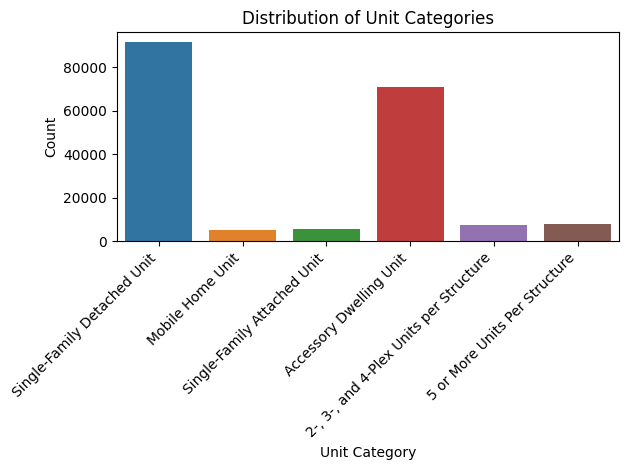

In [ ]:
ax = sns.countplot(x='UNIT_CAT', data=bp)
plt.title('Distribution of Unit Categories')
plt.xlabel('Unit Category')
plt.ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Types of columns:

In [ ]:
bp.columns

Index(['JURS_NAME', 'CNTY_NAME', 'YEAR', 'APN', 'PRIOR_APN', 'STREET_ADDRESS',
       'PROJECT_NAME', 'JURS_TRACKING_ID', 'UNIT_CAT', 'TENURE',
       'APP_SUBMIT_DT', 'VLOW_INCOME_DR', 'VLOW_INCOME_NDR', 'LOW_INCOME_DR',
       'LOW_INCOME_NDR', 'MOD_INCOME_DR', 'MOD_INCOME_NDR', 'ABOVE_MOD_INCOME',
       'TOT_PROPOSED_UNITS', 'TOT_APPROVED_UNITS', 'TOT_DISAPPROVED_UNITS',
       'APP_SUBMITTED_SB35', 'DENSITY_BONUS_RECEIVED',
       'DENSITY_BONUS_APPROVED', 'APPLICATION_STATUS', 'NOTES'],
      dtype='object')

How are each of the columns related to one another?

<ipython-input-11-d5349684a752>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = bp.corr()


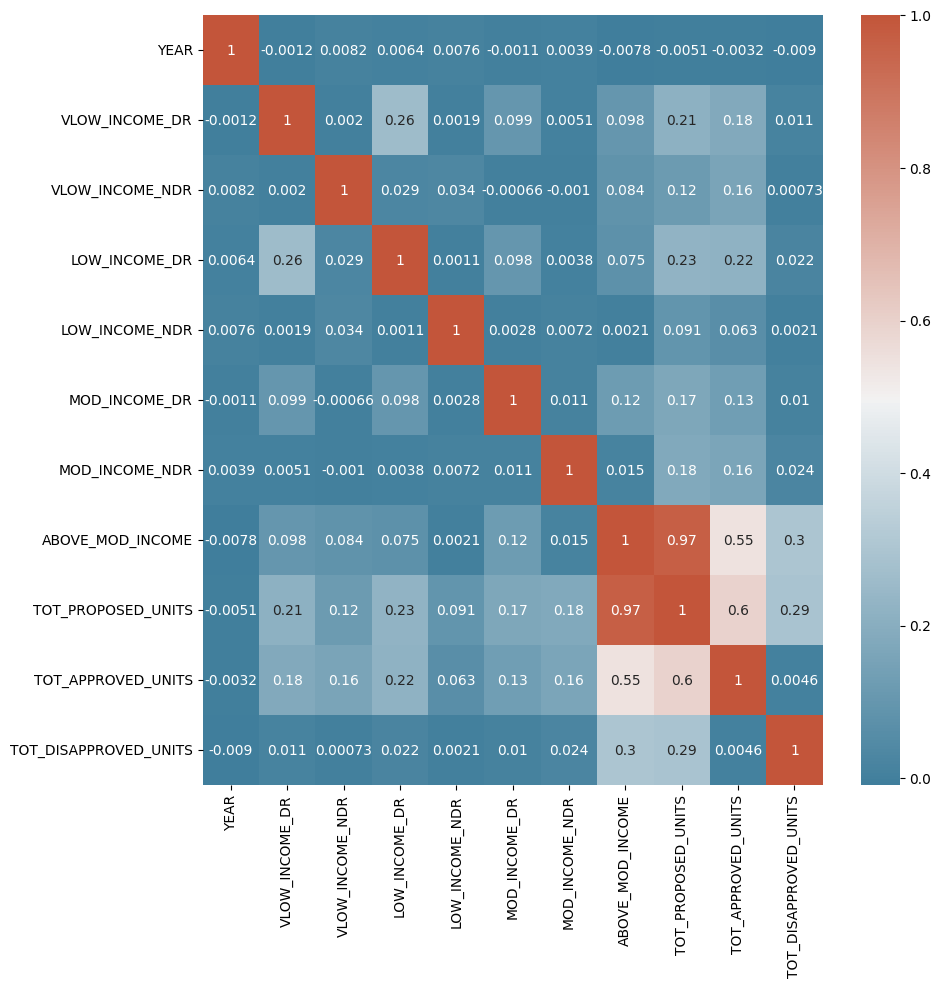

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corrmat = bp.corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(corrmat, annot=True,cmap=cmap)

#### Population Estimates from Census estimates

The Census Bureau's Population Estimates Program (PEP) produces estimates of the population for the United States, its states, counties, cities, and towns, as well as for the Commonwealth of Puerto Rico and its municipios. Demographic components of population change (births, deaths, and migration) are produced at the national, state, and county levels of geography. Additionally, housing unit estimates are produced for the nation, states, and counties. We will be selecting for the "POPEST" columns based on their predictions of populations.

Read about their specific methodology for collecting data and weighing the population estimates [here](https://www2.census.gov/programs-surveys/popest/technical-documentation/methodology/2020-2022/methods-statement-v2022.pdf).

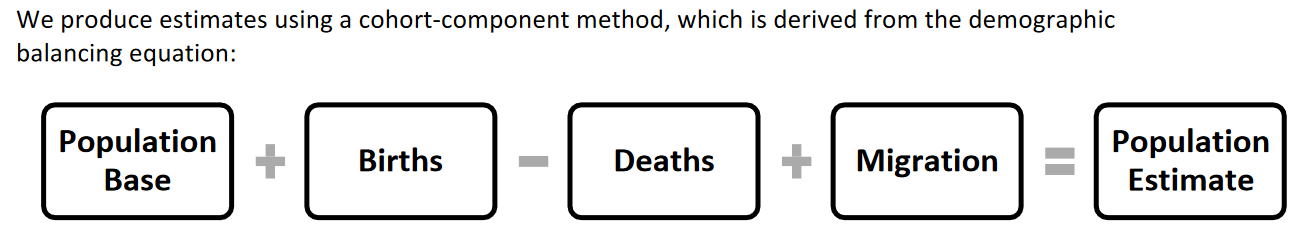

In [ ]:
import pandas as pd
# Import the 2018 to 2019 estimates
pop1020 = pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/counties/totals/co-est2020-alldata.csv", encoding='latin-1')
# select for the county names and the population estimates for each county for the years of 2018 and 2019.
ca_pop1020 = pop1020[pop1020["STNAME"]=="California"][['CTYNAME','POPESTIMATE2018','POPESTIMATE2019']]
ca_pop1020['NAME'] = ca_pop1020['CTYNAME'].str.upper()
# Remove the word "County" from the county names
ca_pop1020['NAME'] = ca_pop1020['NAME'].str.replace(' COUNTY', '')

# Now find the 2020 to 2022 estimates
pop2022 = pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/counties/totals/co-est2022-alldata.csv", encoding='latin-1')
ca_pop2022 = pop2022[pop2022["STNAME"]=="California"][['CTYNAME','POPESTIMATE2020','POPESTIMATE2021','POPESTIMATE2022']]
ca_pop = ca_pop2022.merge(ca_pop1020, on="CTYNAME")
ca_pop

,CTYNAME,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2018,POPESTIMATE2019,NAME
0,California,39501653,39142991,39029342,39437463,39437610,CALIFORNIA
1,Alameda County,1680380,1643837,1628997,1666596,1668412,ALAMEDA
2,Alpine County,1204,1235,1190,1081,1113,ALPINE
3,Amador County,40532,41144,41412,39349,39693,AMADOR
4,Butte County,210135,206190,207303,230330,218726,BUTTE
5,Calaveras County,45346,46219,46563,45747,46119,CALAVERAS
6,Colusa County,21858,21913,21914,21389,21474,COLUSA
7,Contra Costa County,1165986,1163298,1156966,1150840,1152883,CONTRA COSTA
8,Del Norte County,27601,27553,27082,27793,27903,DEL NORTE
9,El Dorado County,191220,193590,192646,190925,193057,EL DORADO


<ipython-input-13-bfb557af1045>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_yr["NAME"] = bp_yr["CNTY_NAME"]
<ipython-input-13-bfb557af1045>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_yr["NAME"] = bp_yr["CNTY_NAME"]
<ipython-input-13-bfb557af1045>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

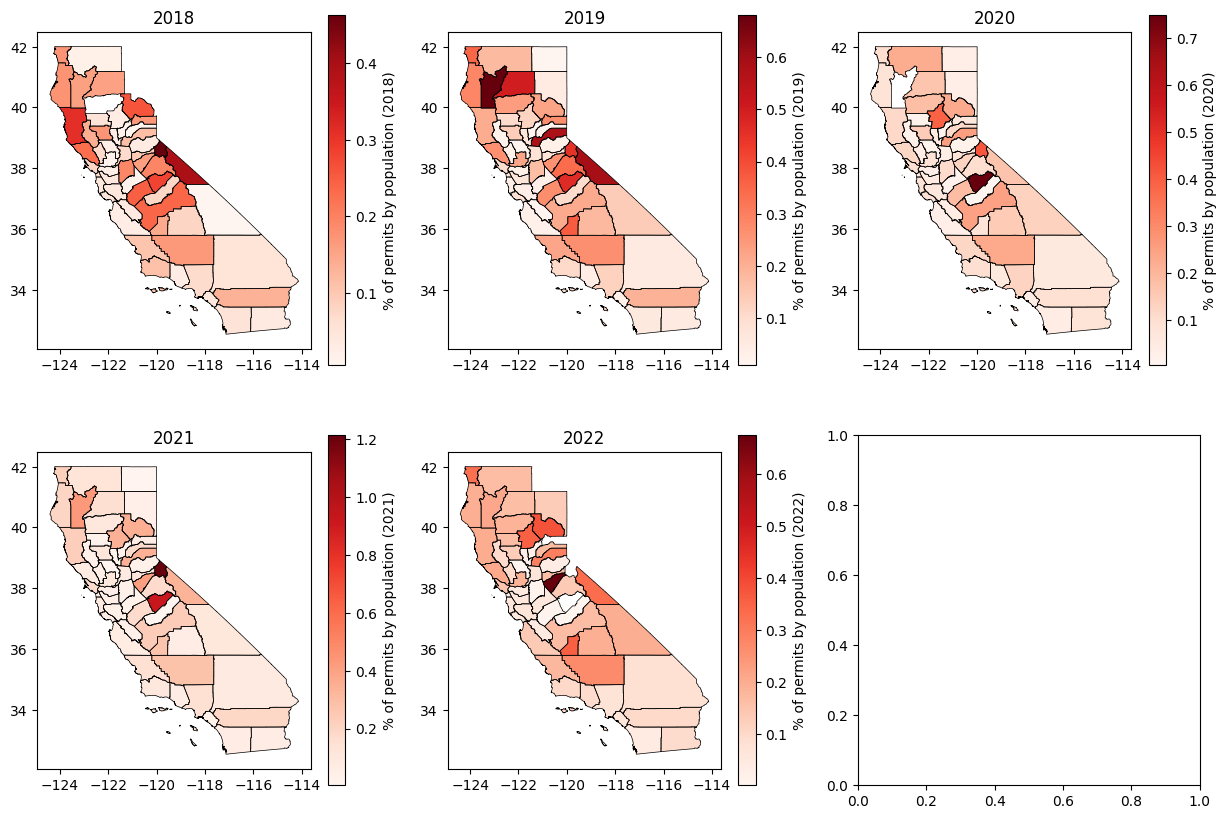

In [ ]:
ca_gdf = gdf
ca_gdf['NAME']=ca_gdf['NAME_UCASE']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
years = np.sort(bp["YEAR"].unique())
for i,year in enumerate(years):
  bp_yr = bp[bp["YEAR"]==year]
  bp_yr["NAME"] = bp_yr["CNTY_NAME"]
  counts = bp_yr.value_counts("NAME").to_frame().rename(columns={0: 'COUNTS'})
  name = "POPESTIMATE"+str(year)
  counts = counts.merge(ca_pop, on="NAME")
  counts["PERM_PERC"] = (counts["COUNTS"]/counts[name])*100
  ca_merge = counts.merge(ca_gdf, on = "NAME")
  ca_merge = gpd.GeoDataFrame(ca_merge, geometry='geometry')
  ax = axs[i // 3, i % 3]
  ax.set_title(str(year).upper())
  ca_merge.plot(ax = ax, column = "PERM_PERC", cmap = "Reds", legend=True, legend_kwds={"label": "% of permits by population ("+str(year)+")"})
  ca_merge.geometry.boundary.plot(color = None, edgecolor="k", linewidth=.5, ax = ax)

Text(0, 0.5, 'Count')

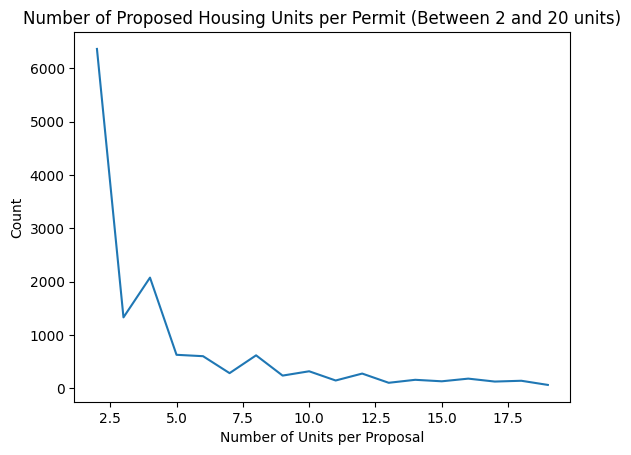

In [ ]:
over_1_unit = bp[bp['TOT_PROPOSED_UNITS'] > 1]
under_25_units = over_1_unit[over_1_unit['TOT_PROPOSED_UNITS'] < 20]
units = under_25_units.groupby('TOT_PROPOSED_UNITS').count()['APN']
units.plot()

plt.title('Number of Proposed Housing Units per Permit (Between 2 and 20 units)')
plt.xlabel('Number of Units per Proposal')
plt.ylabel('Count')


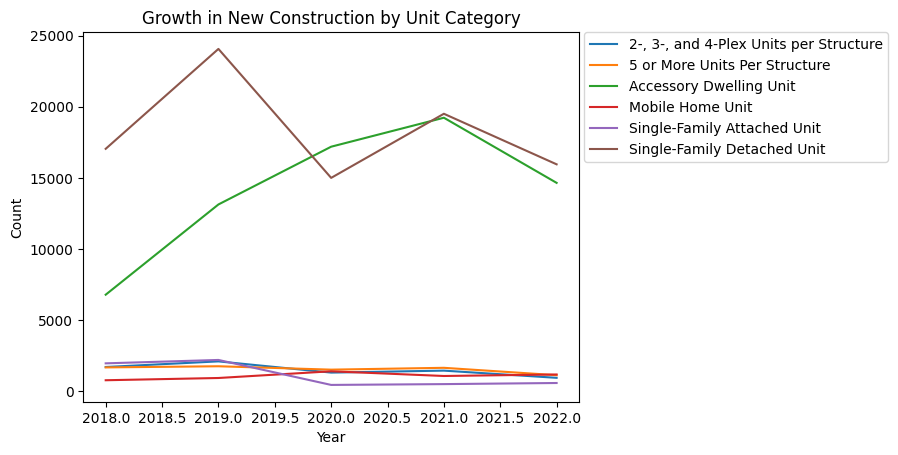

In [ ]:
unit_cat_counts = bp.groupby(['YEAR', 'UNIT_CAT']).size().reset_index(name='count')

ax = sns.lineplot(x='YEAR', y='count', hue='UNIT_CAT', data=unit_cat_counts)
plt.title('Growth in New Construction by Unit Category')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

plt.show()

It seems as if Central California has the highest amounts of permits being approved relative to its population. It also seems that singe-family detached units and ADUs are on the rise.

#### Interest Rates

In [ ]:
# Imported data for 30-Year Fixed Rate Mortgage Average in the United States
# retrieved from FRED, Federal Reserve Bank of St. Louis
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=MORTGAGE30US#"
r = requests.get(url)
ir30 = pd.read_csv(io.StringIO(r.text))

# Imported data for 15-Year Fixed Rate Mortgage Average in the United States
# retrieved from FRED, Federal Reserve Bank of St. Louis
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=MORTGAGE15US#"
r = requests.get(url)
ir15 = pd.read_csv(io.StringIO(r.text))

**Interest Rates**

Our interest rate data is pretty straightforward. It includes two columns: one stores monthly dates from 1991 to present, the other stores the according mortgage rates (either 30 year or 15 year).

The 15-year mortgage rate refers to the interest rate charged on a mortgage loan with a 15-year repayment term. (30-year follows same logic).

For context, we can look at the general trends of this data since 1991, but it will be more useful to also look at only the period of time 2018-present).

In [ ]:
# A quick visualization of the first 5 rows of the 15-year rate data
ir15.head()

,DATE,MORTGAGE15US
0,1991-08-30,8.77
1,1991-09-06,8.79
2,1991-09-13,8.68
3,1991-09-20,8.62
4,1991-09-27,8.59


In [ ]:
# A quick visualization of the first 5 rows of the 30-year rate data
ir30.head()

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [ ]:
#Check if any null values
null_counts_15 = ir15.isnull().sum()
null_counts_15

DATE            0
MORTGAGE15US    0
dtype: int64

In [ ]:
#Check if any null values
null_counts_30 = ir30.isnull().sum()
null_counts_30

DATE            0
MORTGAGE30US    0
dtype: int64

In [ ]:
#Find the mean, median, mode, and standard deviation for the 15 year interest data
mean_rate15 = ir15['MORTGAGE15US'].mean()
median_rate15 = ir15['MORTGAGE15US'].median()
mode_rate15 = ir15['MORTGAGE15US'].mode()[0]
std_rate15 = ir15['MORTGAGE15US'].std()


print('Mean MORTGAGE 15 year US rate:', mean_rate15)
print('Median MORTGAGE 15 year US rate:', median_rate15)
print('Mode MORTGAGE 15 year US rate:', mode_rate15)
print('Standard deviation of 15 yr rates:', std_rate15)

#Now do the same for the 30 year mortgage interest rates
mean_rate30 = ir30['MORTGAGE30US'].mean()
median_rate30 = ir30['MORTGAGE30US'].median()
mode_rate30 = ir30['MORTGAGE30US'].mode()[0]
std_rate30 = ir30['MORTGAGE30US'].std()

print(' ')

print('Mean MORTGAGE 30 year US rate:', mean_rate30)
print('Median MORTGAGE 30 year US rate:', median_rate30)
print('Mode MORTGAGE 30 year US rate:', mode_rate30)
print('Standard deviation of 30 yr rates:', std_rate30)

Mean MORTGAGE 15 year US rate: 5.19412084592145
Median MORTGAGE 15 year US rate: 5.32
Mode MORTGAGE 15 year US rate: 2.77
Standard deviation of 15 yr rates: 1.821861017478487
 
Mean MORTGAGE 30 year US rate: 7.745433823529412
Median MORTGAGE 30 year US rate: 7.42
Mode MORTGAGE 30 year US rate: 8.93
Standard deviation of 30 yr rates: 3.2680072494041736


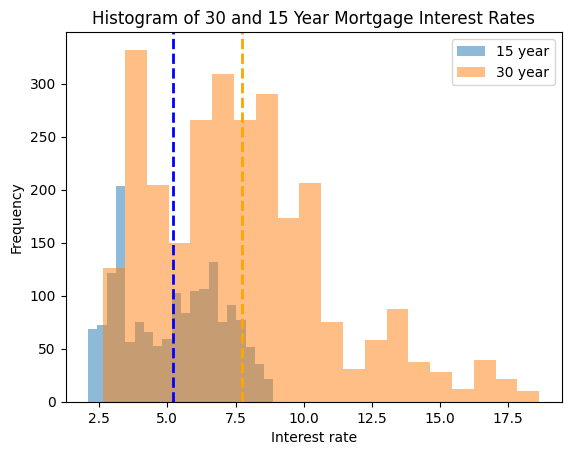

In [ ]:
#Plot a histogram showing the distribution of the interest rates, and plot the means
plt.hist(ir15['MORTGAGE15US'], bins=20, alpha=0.5)
plt.hist(ir30['MORTGAGE30US'], bins=20, alpha=0.5)
plt.xlabel('Interest rate')
plt.ylabel('Frequency')
plt.legend(['15 year', '30 year', 'Mean 15', 'Mean 30'])
plt.title('Histogram of 30 and 15 Year Mortgage Interest Rates')
plt.axvline(mean_rate15, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(mean_rate30, color='orange', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
ir = ir15.merge(ir30)
ir.head()

,DATE,MORTGAGE15US,MORTGAGE30US
0,1991-08-30,8.77,9.15
1,1991-09-06,8.79,9.14
2,1991-09-13,8.68,9.02
3,1991-09-20,8.62,8.95
4,1991-09-27,8.59,8.92


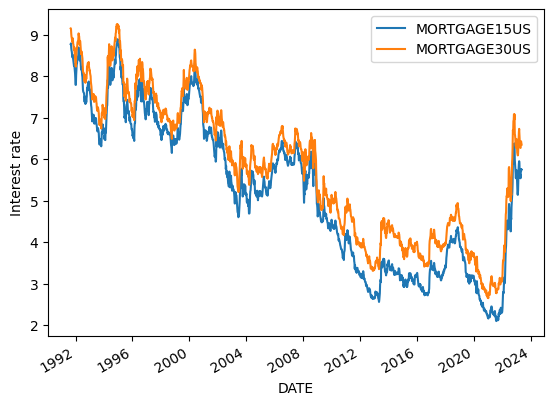

In [ ]:
ir['DATE'] = pd.to_datetime(ir['DATE']) # Convert the date column to datetime format
ir.set_index('DATE', inplace=True) # Set the date column as the index
ir.plot()

plt.ylabel('Interest rate')
plt.show()

#### Housing Market

In [ ]:
# Imported data for Zillow Home Value Index (ZHVI) All Home Types, smoothed, seasonally adjusted
url = "https://files.zillowstatic.com/research/public_csvs/zhvi/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1680747712"
r = requests.get(url)
pr = pd.read_csv(io.StringIO(r.text))
pr.head()

# We are selecting only data from CA because it is relevant to us.
ca = pr[pr["State"]=="CA"]

In [ ]:
#What are the columns present in our dataset?
ca.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
       '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30'],
      dtype='object', length=288)

In [ ]:
#An example of what an entry looks like
ca.loc[1]

RegionID              12447
SizeRank                  1
RegionName      Los Angeles
RegionType             city
StateName                CA
                  ...      
2022-12-31    940643.449101
2023-01-31    931859.834124
2023-02-28    918976.831061
2023-03-31    907602.720341
2023-04-30    901961.100495
Name: 1, Length: 288, dtype: object

In [ ]:
#find the columns that contain the price data
price_cols = ca.loc[:, '2000-01-31':'2023-02-28']

# calculate the average price for each location
location_avg_prices = price_cols.mean(axis=1)

# calculate the overall average price
overall_avg_price = location_avg_prices.mean()

#add a column to a dataframe copy called ca_copy that contains the average price for each row
ca_copy = ca.copy()
ca_copy['OverallAveragePrice'] = location_avg_prices

print("Overall average price:", overall_avg_price)

#Do the same process but for "relevant years" of 2018 to present:

relevant_price_cols = ca.loc[:,'2018-01-31':'2023-02-28']
r_location_avg_prices = relevant_price_cols.mean(axis=1)
relevant_avg_price = r_location_avg_prices.mean()

ca_copy['Since2018_AveragePrice'] = r_location_avg_prices

print("2018 to present average price:", relevant_avg_price)

Overall average price: 466261.7304162683
2018 to present average price: 652434.4986692612


In [ ]:
merged_geo = gdf.merge(ca_copy, left_on = 'FMNAME_PC', right_on = 'CountyName')

In [ ]:
quantiles = merged_geo['OverallAveragePrice'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
quantile_labels = ['Low', 'Medium-low', 'Medium-high', 'High', 'Really High']
merged_geo['PriceLevel'] = pd.qcut(merged_geo['OverallAveragePrice'], q=5, labels=quantile_labels)

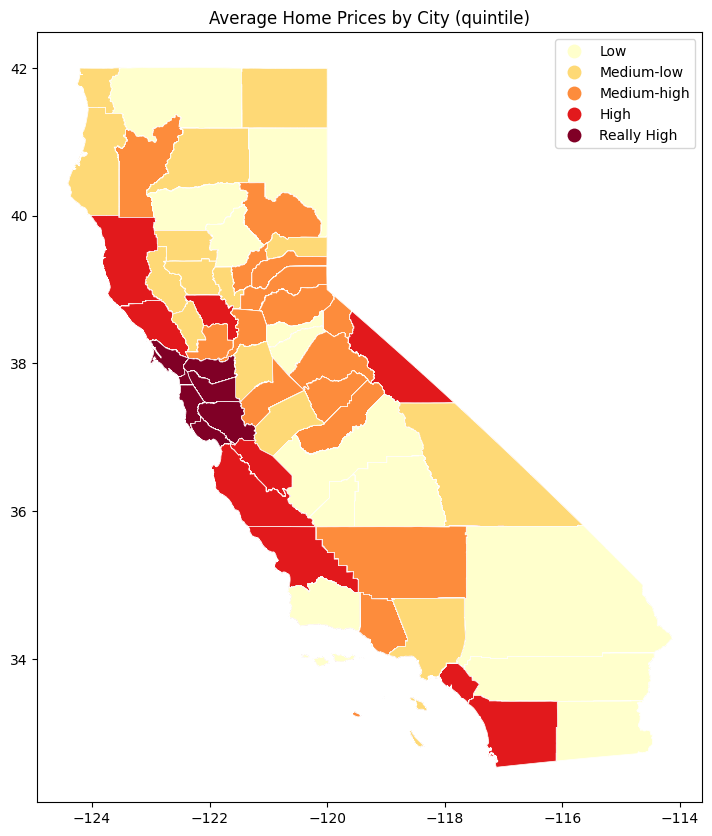

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_geo.plot(column='PriceLevel', cmap='YlOrRd', linewidth=0.5, edgecolor='white', legend=True, ax=ax)
ax.set_title('Average Home Prices by City (quintile)')
plt.show()

Here we can see what we already suspect about housing prices and their distribution across CA.

<ipython-input-32-bbb8f058c062>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = ca.groupby(['RegionName']).mean()


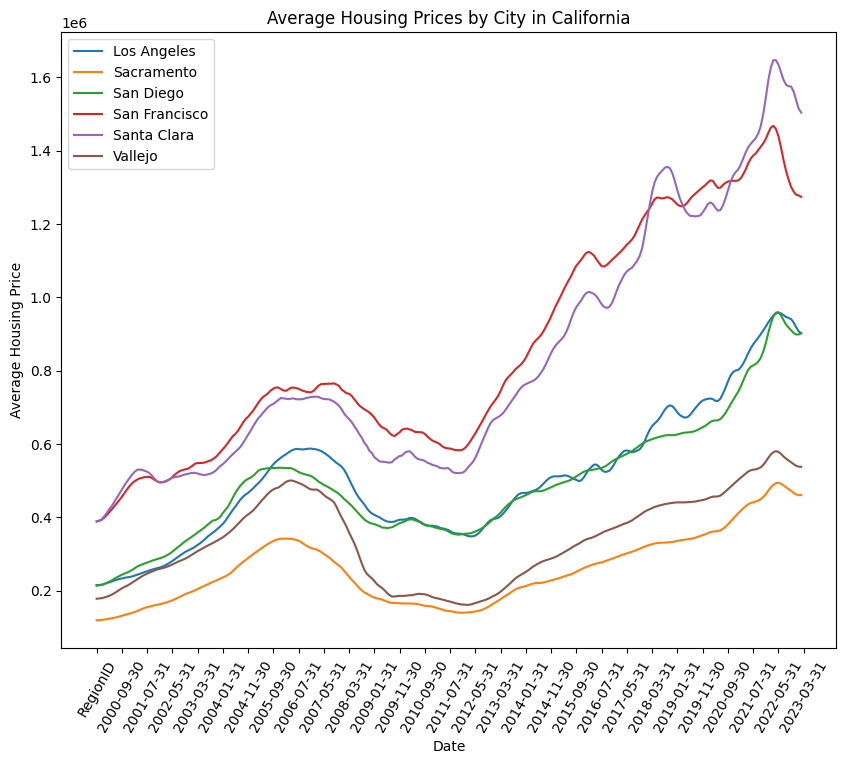

In [ ]:
grouped = ca.groupby(['RegionName']).mean()
grouped_drop = grouped.drop(columns=['RegionID','SizeRank'])
top_6 = grouped_drop.loc[['San Francisco','Vallejo','San Diego','Sacramento','Los Angeles','Santa Clara']]

# Plot the average housing prices over time for each city
fig, ax = plt.subplots(figsize=(10, 8))
for name, group in top_6.groupby(level=[0]):
    ax.plot(group.columns, group.T, label=name)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Average Housing Price')
ax.set_title('Average Housing Prices by City in California')
plt.xticks(range(0, len(grouped.columns), 10), grouped.columns[::10], rotation=60)
plt.show()

#### Construction Costs
**[California Construction Cost Index](https://www.dgs.ca.gov/RESD/Resources/Page-Content/Real-Estate-Services-Division-Resources-List-Folder/DGS-California-Construction-Cost-Index-CCCI)**

Public Data is accessed from California government Real Estate Services Division (*Annual Percentage is calculated from December to December.*)



In [ ]:
construction_costs = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December', 'Annual % *'],
    2023: [9246, 9166, 9118, 9026, None, None, None, None, None, None, None, None, None],
    2022: [8151, 8293, 8736, 8903, 9001, 8925, 9110, 8792, 8604, 8712, 8765, 8823, 9.3],
    2021: [7090, 7102, 7130, 7150, 7712, 7746, 7892, 8122, 7900, 8080, 8141, 8072, 13.4],
    2020: [6995, 6945, 6947, 6955, 6958, 7041, 6984, 6988, 7036, 7120, 7123, 7120, 2.8],
    2019: [6684, 6700, 6616, 6841, 6852, 6854, 6854, 6823, 6814, 6851, 6895, 6924, 3.6],
    2018: [6596, 6596, 6596, 6596, 6596, 6598, 6643, 6613, 6674, 6679, 6679, 6684, 1.3],
    2017: [6373, 6373, 6373, 6461, 6455, 6470, 6474, 6620, 6620, 6596, 6596, 6596, 3.5],
    2016: [6106, 6132, 6248, 6249, 6240, 6238, 6245, 6244, 6267, 6343, 6344, 6373, 4.4]
}

ccost = pd.DataFrame(construction_costs)

In [ ]:
ccost.head()

,Month,2023,2022,2021,2020,2019,2018,2017,2016
0,January,9246.0,8151.0,7090.0,6995.0,6684.0,6596.0,6373.0,6106.0
1,February,9166.0,8293.0,7102.0,6945.0,6700.0,6596.0,6373.0,6132.0
2,March,9118.0,8736.0,7130.0,6947.0,6616.0,6596.0,6373.0,6248.0
3,April,9026.0,8903.0,7150.0,6955.0,6841.0,6596.0,6461.0,6249.0
4,May,NaN,9001.0,7712.0,6958.0,6852.0,6596.0,6455.0,6240.0


Text(0, 0.5, 'Annual Percent')

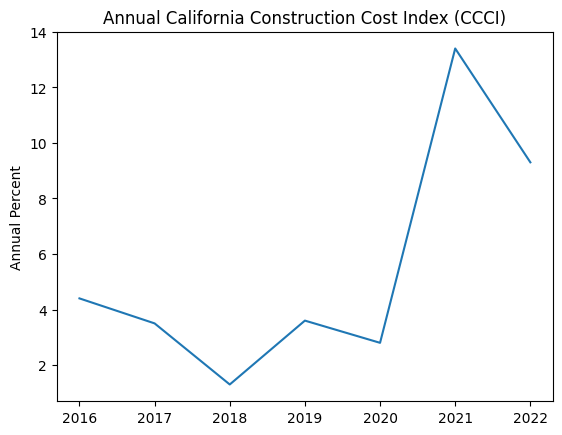

In [ ]:
ccost = ccost.set_index('Month')
ccost.loc['Annual % *'].plot()
plt.title("Annual California Construction Cost Index (CCCI)")
plt.ylabel("Annual Percent")

#### Consumer Sentiment
[**Consumer Sentiment**](https://fred.stlouisfed.org/series/UMCSENT#0)

In [ ]:
# Imported data for University of Michigan: Consumer Sentiment (UMCSENT)
# retrieved from FRED, Federal Reserve Bank of St. Louis
cci_data = {'DATE': ['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01'],
        'UMCSENT': [95.7, 99.7, 101.4, 98.8, 98.0, 98.2, 97.9, 96.2, 100.1, 98.6, 97.5, 98.3, 91.2, 93.8, 98.4, 97.2, 100.0, 98.2, 98.4, 89.8, 93.2, 95.5, 96.8, 99.3, 99.8, 101.0, 89.1, 71.8, 72.3, 78.1, 72.5, 74.1, 80.4, 81.8, 76.9, 80.7, 79.0, 76.8, 84.9, 88.3, 82.9, 85.5, 81.2, 70.3, 72.8, 71.7, 67.4, 70.6, 67.2, 62.8, 59.4, 65.2, 58.4, 50, 51.5, 58.2, 58.6, 59.9, 56.8, 59.7, 64.9, 67]}

cci = pd.DataFrame(cci_data)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '2022-05-01'),
  Text(0.0, 0, '2018-01-01'),
  Text(10.0, 0, '2018-11-01'),
  Text(20.0, 0, '2019-09-01'),
  Text(30.0, 0, '2020-07-01'),
  Text(40.0, 0, '2021-05-01'),
  Text(50.0, 0, '2022-03-01'),
  Text(60.0, 0, '2023-01-01'),
  Text(70.0, 0, '')])

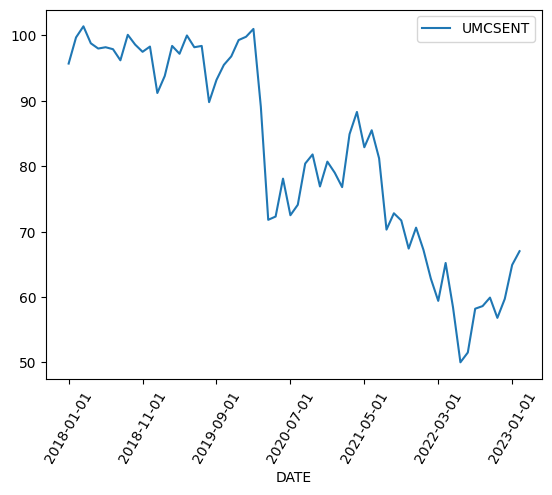

In [ ]:
cci.set_index('DATE').plot()
plt.xticks(rotation=60)

#### American Community Survey

We will use chosen variables from the dictionary found [here](https://api.census.gov/data/2019/acs/acs5/variables.html).

Are the counts of these permits associated with certain input variables? We will use Census Data Estimates to look at **Rates of Poverty**, **People of Color**, **Income Levels**, and **Education Levels** to see if there is some kind of association. The ACS 5-year statistic for these population estimates.


When looking up the Census Estimates between the years of 2010 and 2020 (for 2018 to 2019, in this case), and for the years of 2020 to 2030 (for 2021), the Census Estimates use the the American Community Survey (ACS) data. This is a demographics survey program conducted by the U.S. Census Bureau. It regularly gathers information previously contained only in the long form of the decennial census, including ancestry, citizenship, educational attainment, income, language proficiency, migration, disability, employment, and housing characteristics. It then weighs them based on past population estimates and future projections, taking into account the granulairty of the data measured. More on the weighing of the data for the CAS can be found [here](https://www2.census.gov/programs-surveys/acs/tech_docs/accuracy/ACS_Accuracy_of_Data_2020.pdf) and here [here](https://www.census.gov/programs-surveys/acs/technical-documentation/user-notes/2022-06.html).

An example of a call in the ACS and the resulting output for the ratio of income to poverty in the past 12 months, known as the variable of C17002_001E according to [this ACS variable booklet](https:// [link text](https://api.census.gov/data/2019/acs/acs5/variables.html)), for each county in CA for the year of 2018 would look like this, using the census api with the documententation found [here](https://github.com/datamade/census).

In [ ]:
# Use an API to call for each of the variables.
census_api = "bda05a86dd27663610685a90966e4534ff6e8244"

# variables selected from https://api.census.gov/data/2019/acs/acs5/variables.html
# Obtain Census variables from the 2019 ACS at the tract level for the county of SF (FIPS code: 075)
# C17002_001E: count of ratio of income to poverty in the past 12 months (total)
# C17002_002E: count of ratio of income to poverty in the past 12 months (< 0.50)
# C17002_003E: count of ratio of income to poverty in the past 12 months (0.50 - 0.99)

year = 2018
c = Census(census_api)
bp_yr = bp[bp["YEAR"]==year]
pov_census = c.acs5.state_county(fields = ('NAME', 'C17002_001E'),
                                      state_fips = states.CA.fips,
                                      county_fips = "*",
                                      year = year)
pov_df = pd.DataFrame(pov_census)

##### Poverty Rate in CA County



*   **Definition:** Following the Office of Management and Budget's (OMB) Statistical Policy Directive 14, the Census Bureau uses a set of money income thresholds that vary by family size and composition to determine who is in poverty. If a family's total income is less than the family's threshold, then that family and every individual in it is considered in poverty. The rate of poverty compares the amount of people below that threshhold in a county over the total population of the county.
*   **Calculation:** We can estimate the poverty rate by dividing the sum of C17002_002E (ratio of income to poverty in the past 12 months, < 0.50) and C17002_003E (ratio of income to poverty in the past 12 months, 0.50 - 0.99) by B01003_001E (total population).
* **Rationale:** A [report from the Public Policy Institute of California](https://www.ppic.org/blog/interactive-many-californians-live-in-or-near-poverty/), which used a methodology similar to that of the Census Bureau, found that California's "supplemental poverty rate" and "[near-poverty](https://www.capolicylab.org/news/new-analysis-california-unemployment-claims-surged-in-august-driven-in-part-by-questionable-increase-in-pua-claims/)" rate are approximately the same. When these two categories are combined, it means that about one-third of the state's residents are struggling financially. The main factor driving California's high poverty rates is the exorbitant cost of housing, which forces many Californians to spend a significant portion of their incomes on shelter due to limited construction. Consequently, poverty rates in a California county play a critical role in predicting the number of housing permits that will be approved for the state, especially for a policy like SB-9 which targets lower or middle income people wanting to attain housing.

In [ ]:
import statistics
import numpy as np
import scipy.stats
census_api = "bda05a86dd27663610685a90966e4534ff6e8244"

year_pov = []
sd_pov = []
mean_pov = []
variance_pov = []
median_pov = []
mode_pov = []

c = Census(census_api)
years = range(2016, 2021)
for i,year in enumerate(years):
  bp_yr = bp[bp["YEAR"]==year]
  pov_census = c.acs5.state_county(fields = ('NAME', 'C17002_001E', 'C17002_002E', 'C17002_003E', 'B01003_001E'),
                                      state_fips = states.CA.fips,
                                      county_fips = "*",
                                      year = year)
  pov_df = pd.DataFrame(pov_census)
  pov_df["Poverty_Rate"] = (pov_df["C17002_002E"] + pov_df["C17002_003E"]) / pov_df["B01003_001E"]
  mean_pov.append(statistics.mean(pov_df["Poverty_Rate"]))
  median_pov.append(statistics.median(pov_df["Poverty_Rate"]))
  mode_pov.append(statistics.mode(pov_df["Poverty_Rate"]))
  sd_pov.append(statistics.stdev(pov_df["Poverty_Rate"]))
  variance_pov.append(statistics.variance(pov_df["Poverty_Rate"]))
  year_pov.append(year)

data = {
    'Year of Poverty Rate': year_pov,
    'Standard Deviation of Poverty Rate': sd_pov,
    'Mean of Poverty Rate': mean_pov,
    'Variance of Poverty Rate': variance_pov,
    'Median of Poverty Rate': median_pov,
    'Mode of Poverty Rate': mode_pov
}
df = pd.DataFrame(data)
df

,Year of Poverty Rate,Standard Deviation of Poverty Rate,Mean of Poverty Rate,Variance of Poverty Rate,Median of Poverty Rate,Mode of Poverty Rate
0,2016,0.050367,0.156942,0.002537,0.157775,0.136482
1,2017,0.048780,0.152261,0.002379,0.148363,0.227611
2,2018,0.048666,0.145456,0.002368,0.140412,0.221723
3,2019,0.046165,0.139017,0.002131,0.132140,0.207151
4,2020,0.042804,0.129855,0.001832,0.122679,0.091515


##### People of Color (POC) Percentage in each CA County

*   **Definition:** Minority populations include persons who identify as any of the following groups as defined by the Census Bureau in accordance with guidelines provided by the U.S. Office of Management and Budget: American Indian or Pacific Islander Alone (Non-Hispanic/non-Latino); Asian Alone (non-Hispanic/non-Latino); Black or African-American Alone (non-Hispanic/non-Latino); and Other (Some Other Race, Two or More Races). The Office of Management and Budget defines "Hispanic or Latino" ethnicity as a person of Cuban, Mexican, Puerto Rican, South or Central American, or other Spanish culture or origin regardless of race. USE: American Community Survey (ACS) Table B03002 (Hispanic or Latino Origin By
Race), 5 Year Estimates for each year from 2018 to 2020.


*   **Calculation:**  
(Total Population - White Alone * (Non-Hispanic/non-Latino)) / Total Population
(B03002_001E - B03002_003E) / B03002_001E

* **Rationale:** The Measure of America's study, "Portrait of California," revealed concerning findings about the disparities faced by communities of color. Native Americans in California have an average lifespan of only 67 years, which has decreased by over 7 years since 2012. Black youth are more than twice as likely as their white counterparts to be disconnected from both school and work in the years after high school. In San Jose, Latinos earn only $0.46 for every dollar earned by white workers. According to Laura Laderman, chief statistician at Measure of America, these inequities are not random, but rather the result of policy choices. California, like the United States, has a history of laws and policies that have had long-lasting negative impacts on people of color.  Monitoring and addressing race-based disparities in access to opportunities and resources is crucial, especially in the context of housing approval and purchasing, especially with regards to studying whether a housing policy like SB-9 has been effective in mitigating or increasing those effects.


In [ ]:
import statistics
import numpy as np
import scipy.stats

year_pov = []
sd_pov = []
mean_pov = []
variance_pov = []
median_pov = []
mode_pov = []

for i,year in enumerate(years):
  bp_yr = bp[bp["YEAR"]==year]
  # (B03002_001E - B03002_003E) / B03002_001E
  poc_census = c.acs5.state_county(fields = ('NAME', 'B03002_001E', 'B03002_003E', 'B03002_001E'),
                                      state_fips = states.CA.fips,
                                      county_fips = "*",
                                      year = year)
  poc_df = pd.DataFrame(poc_census)
  poc_df["POC"] = (poc_df["B03002_001E"] - poc_df["B03002_003E"]) / poc_df["B03002_001E"] *100
  val = poc_df["POC"]
  mean_pov.append(statistics.mean(val))
  median_pov.append(statistics.median(val))
  mode_pov.append(statistics.mode(val))
  sd_pov.append(statistics.stdev(val))
  variance_pov.append(statistics.variance(val))
  year_pov.append(year)

data = {
    'Year': year_pov,
    'Standard Deviation of %POC in CA County': sd_pov,
    'Mean of %POC in CA County': mean_pov,
    'Variance of %POC in CA County': variance_pov,
    'Median of %POC in CA County': median_pov,
    'Mode of %POC in CA County': mode_pov
}
df = pd.DataFrame(data)
df

,Year,Standard Deviation of %POC in CA County,Mean of %POC in CA County,Variance of %POC in CA County,Median of %POC in CA County,Mode of %POC in CA County
0,2016,19.710910,44.748001,388.519966,46.609436,53.288112
1,2017,19.827964,45.237360,393.148171,47.156798,71.168705
2,2018,19.868937,45.735886,394.774645,47.613527,71.752114
3,2019,19.905476,46.255493,396.227993,48.050202,72.350045
4,2020,19.915117,47.030917,396.611898,48.853772,69.391677


##### Percent of Rent Burdened Households in each CA county


*   **Definition:** Households are considered severely rent-burdened when they pay over 50% of
their income on rent. USE: American Community Survey (ACS) Table B25070 (Gross Rent as a Percentage of
Household Income In the Past 12 Months), 5 Year Estimates

* **Calculation:** Renter-occupied housing units paying 50.0 percent or more / Total
renter-occupied housing units
B25070_010E / B25070_001E

*   **Rationale:** Based on data from the Public Policy Institute of California, the exorbitant costs of homeownership coupled with the pervasive racialized wealth gap in California have resulted in a growing dependence on rental properties for housing among state residents. Based on recent data from the California Department of Housing and Community Development, the average monthly rent in California has risen by a staggering 37% over the past decade. This escalating trend in rental costs presents a formidable burden for middle and low-income families and individuals, who are forced to allocate a significant portion of their income towards rent, thereby impeding their ability to meet other essential needs such as food, medical care, and saving for a future home purchase. Since SB-9 targets home-owners, knowing the rate of rent burdened population in a county can be a good indicator to see whether or not this housing policy can help CA in mitigating or increasing those effects.



In [ ]:
#scipy.stats.pearsonr(x, y)[0]
import numpy as np
import scipy.stats
census_api = "bda05a86dd27663610685a90966e4534ff6e8244"

year_v = []
r_val = []
c = Census(census_api)
years = range(2018, 2021)
for i,year in enumerate(years):
  bp_yr = bp[bp["YEAR"]==year]
  poc_census = c.acs5.state_county(fields = ('NAME', 'B25070_010E', 'B25070_001E'),
                                      state_fips = states.CA.fips,
                                      county_fips = "*",
                                      year = year)
  poc_df = pd.DataFrame(poc_census)
  poc_df["RENT_BUR"] = (poc_df["B25070_010E"]/ poc_df["B25070_001E"]) *100
  val = poc_df["RENT_BUR"]
  mean_pov.append(statistics.mean(val))
  median_pov.append(statistics.median(val))
  mode_pov.append(statistics.mode(val))
  sd_pov.append(statistics.stdev(val))
  variance_pov.append(statistics.variance(val))
  year_pov.append(year)

data = {
    'Year': year_pov,
    'Standard Deviation of %Rent Burdened in CA County': sd_pov,
    'Mean of %Rent Burdened in CA County': mean_pov,
    'Variance of %Rent Burdened in CA County': variance_pov,
    'Median of %Rent Burdened in CA County': median_pov,
    'Mode of %Rent Burdened in CA County': mode_pov
}
df = pd.DataFrame(data)
df

,Year,Standard Deviation of %Rent Burdened in CA County,Mean of %Rent Burdened in CA County,Variance of %Rent Burdened in CA County,Median of %Rent Burdened in CA County,Mode of %Rent Burdened in CA County
0,2016,19.710910,44.748001,388.519966,46.609436,53.288112
1,2017,19.827964,45.237360,393.148171,47.156798,71.168705
2,2018,19.868937,45.735886,394.774645,47.613527,71.752114
3,2019,19.905476,46.255493,396.227993,48.050202,72.350045
4,2020,19.915117,47.030917,396.611898,48.853772,69.391677
5,2018,4.505993,24.786923,20.303975,25.749605,22.695407
6,2019,4.348286,24.383245,18.907595,24.850942,22.476644
7,2020,4.703291,23.765674,22.120942,24.535182,23.183762


## Modelling

### Data Preparation for Modelling

#### Importing Packages

In [ ]:
import pandas as pd
# Import any data cleaning libraries here
import sklearn as sk
from shapely.geometry import Point
from shapely import wkt
# Import your selected models here

# Import any other libraries here
import numpy as np
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from census import Census
from us import states
import os
import censusdata
import json
import requests
import os
import io
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import re
import geopandas as gpd
from datetime import datetime
from folium import plugins
from folium.plugins import Draw
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from branca.colormap import linear
import branca.colormap
from folium.plugins import TimestampedGeoJson
from folium.plugins import TimeSliderChoropleth
from matplotlib.dates import YearLocator, DateFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

#### Importing and Cleaning Data

First, the building permit data from the CA.gov website was imported.

In [ ]:
# Retreived from public CA data website, table is also called APR
url = "https://data.ca.gov/dataset/81b0841f-2802-403e-b48e-2ef4b751f77c/resource/c78b769d-cc02-4050-91ef-79ded665b5a8/download/table-a-housing-development-applications-submitted.csv"
r = requests.get(url)
bp = pd.read_csv(io.StringIO(r.text))

<ipython-input-43-e089c33e1ceb>:4: DtypeWarning: Columns (4,6,25) have mixed types. Specify dtype option on import or set low_memory=False.
  bp = pd.read_csv(io.StringIO(r.text))


Next, the populations within each county for that year was a desired parameter. To implement this, the Census Bureau data for population estimates was called for each year; two datasets were called, one that was the estimates for the years of 2010 to 2020, and the other that contained the estimates from 2020 to 2023.

In [ ]:
# Imported data for 30-Year Fixed Rate Mortgage Average in the United States
# retrieved from FRED, Federal Reserve Bank of St. Louis
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=MORTGAGE30US#"
r = requests.get(url)
ir30 = pd.read_csv(io.StringIO(r.text))

# Imported data for 15-Year Fixed Rate Mortgage Average in the United States
# retrieved from FRED, Federal Reserve Bank of St. Louis
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=MORTGAGE15US#"
r = requests.get(url)
ir15 = pd.read_csv(io.StringIO(r.text))

In [ ]:
counts_bp = bp.groupby(["YEAR","CNTY_NAME"]).size().reset_index().rename(columns = {"CNTY_NAME":"NAME"})

In [ ]:
import pandas as pd
# Import the 2018 to 2019 estimates
pop1020 = pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/counties/totals/co-est2020-alldata.csv", encoding='latin-1')
# select for the county names and the population estimates for each county for the years of 2018 and 2019.
ca_pop1020 = pop1020[pop1020["STNAME"]=="California"][['CTYNAME','POPESTIMATE2018','POPESTIMATE2019']]
ca_pop1020['NAME'] = ca_pop1020['CTYNAME'].str.upper()
# Remove the word "County" from the county names
ca_pop1020['NAME'] = ca_pop1020['NAME'].str.replace(' COUNTY', '')

# Now find the 2020 to 2022 estimates
pop2022 = pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/counties/totals/co-est2022-alldata.csv", encoding='latin-1')
ca_pop2022 = pop2022[pop2022["STNAME"]=="California"][['CTYNAME','POPESTIMATE2020','POPESTIMATE2021','POPESTIMATE2022']]
ca_pop = ca_pop2022.merge(ca_pop1020, on="CTYNAME")

The building permit, population estimate, annual mortage rates, and ZHVI were all combined to create the beginnings of our input dataframe: merged_df. The population values were unpivoted from its original CA population estimate DataFrame from wide to long format.

In [ ]:
melted = pd.melt(ca_pop, id_vars = "NAME", value_vars = ["POPESTIMATE2020", "POPESTIMATE2021", "POPESTIMATE2022", "POPESTIMATE2018", "POPESTIMATE2019"], var_name = "Year", value_name = "Population")

In [ ]:
def str_to_year(year):
  num_string = year[11:]
  return int(num_string)

In [ ]:
melted["YEAR"] = melted["Year"].apply(str_to_year)

In [ ]:
merged_df = pd.merge(melted,counts_bp, on = ["NAME","YEAR"])

To normalize the counts of the building permits, the counts by the populations were divided to get a better idea of the distribution of building permits being created.

In [ ]:
merged_df = merged_df.sort_values(["YEAR", "NAME"]).rename(columns = {0:"COUNTS"})
merged_df["PERM_PERC"] = (merged_df["COUNTS"]/merged_df["Population"])*100

Next, the poverty rates, % of POC, and % rent burdened in a population were extractted from the ACS5 estimates. One big issue was the fact that the ACS5 estimates only went as far at 2020, but our dataset contained parameters for 2021 and 2022. As such, a linear regression was used to extrapolate what those values would be for that year so as not to remove a significant portion of our data.

In [ ]:
import statistics
import numpy as np
import scipy.stats
census_api = "bda05a86dd27663610685a90966e4534ff6e8244"

c = Census(census_api)
years = range(2016, 2021)
for i,year in enumerate(years):
  pov_census = c.acs5.state_county(fields = ('NAME', 'C17002_001E', 'C17002_002E', 'C17002_003E', 'B01003_001E'),
                                      state_fips = states.CA.fips,
                                      county_fips = "*",
                                      year = year)
  if i == 0:
      pov_df = pd.DataFrame(pov_census)
      pov_df["Poverty_Rate"] = ((pov_df["C17002_002E"] + pov_df["C17002_003E"]) / pov_df["B01003_001E"])*100
      pov_df["YEAR"] = year
  else:
      new_df = pd.DataFrame(pov_census)
      new_df["Poverty_Rate"] = ((new_df["C17002_002E"] + new_df["C17002_003E"]) / new_df["B01003_001E"])*100
      new_df["YEAR"] = year
      pov_df  = pd.concat([pov_df, new_df], axis=0)

In [ ]:
pov_df['NAME'] = pov_df['NAME'].str.upper()
# Remove the word "County" from the county names
pov_df['NAME'] = pov_df['NAME'].str.replace(' COUNTY, CALIFORNIA', '')
pov_df = pov_df.drop(["C17002_001E","C17002_002E","C17002_003E","B01003_001E","state","county"],axis = 1)

Using linear regression to extrapolate what the Poverty rate would be for the year of 2021 and 2022, and then storing that in a dataframe.

In [ ]:
# use linear regression to extrapolate what the poverty rates would be for 2021 and 2022
import pandas as pd
from sklearn.linear_model import LinearRegression
extrapolated_df = pd.DataFrame(columns=['NAME', 'YEAR', 'Poverty_Rate'])
for county in pov_df['NAME'].unique():
    county_data = pov_df[pov_df['NAME'] == county]
    x = county_data['YEAR'].values.reshape(-1, 1)
    y = county_data['Poverty_Rate'].values.reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    predicted_2021 = model.predict([[2021]])
    predicted_2022 = model.predict([[2022]])
    extrapolated_df = pd.concat([extrapolated_df, pd.DataFrame({'NAME': county, 'YEAR': 2021, 'Poverty_Rate': predicted_2021[0][0]}, index=[0])], ignore_index=True)
    extrapolated_df = pd.concat([extrapolated_df, pd.DataFrame({'NAME': county, 'YEAR': 2022, 'Poverty_Rate': predicted_2022[0][0]}, index=[0])], ignore_index=True)

In [ ]:
combined_df = pd.concat([pov_df, extrapolated_df], ignore_index=True)

# sort by county and year
combined_df = combined_df.sort_values(by=['NAME', 'YEAR'])

# reset index
combined_df = combined_df.reset_index(drop=True)

Combine the ACS5 data with the merged_df on the NAME parameter containing the name of the county.

In [ ]:
 merged_df = pd.merge(merged_df,combined_df, on = ["NAME","YEAR"])

Using the same techniques to find the values for the % POC in each county for that year as the techniques used for the Poverty rate.

In [ ]:
import numpy as np
import scipy.stats
census_api = "bda05a86dd27663610685a90966e4534ff6e8244"

c = Census(census_api)
years = range(2016, 2021)
for i,year in enumerate(years):
  poc_census = c.acs5.state_county(fields = ('NAME', 'B03002_001E', 'B03002_003E'),
                                      state_fips = states.CA.fips,
                                      county_fips = "*",
                                      year = year)
  if i == 0:
      poc_df = pd.DataFrame(poc_census)
      poc_df["POC"] = ((poc_df["B03002_001E"] - poc_df["B03002_003E"]) / poc_df["B03002_001E"]) *100
      poc_df["YEAR"] = year
  else:
      new_df = pd.DataFrame(poc_census)
      new_df["POC"] = ((new_df["B03002_001E"] - new_df["B03002_003E"]) / new_df["B03002_001E"]) *100
      new_df["YEAR"] = year
      poc_df  = pd.concat([poc_df, new_df], axis=0)

Using linear regression to extrapolate what the % POC would be for the year of 2021 and 2022, and then storing that in a dataframe.

In [ ]:
# use linear regression to extrapolate what the % POC would be for 2021 and 2022
import pandas as pd
from sklearn.linear_model import LinearRegression
extrapolated_df = pd.DataFrame(columns=['NAME', 'YEAR', 'POC'])
for county in poc_df['NAME'].unique():
    county_data = poc_df[poc_df['NAME'] == county]
    x = county_data['YEAR'].values.reshape(-1, 1)
    y = county_data['POC'].values.reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    predicted_2021 = model.predict([[2021]])
    predicted_2022 = model.predict([[2022]])
    extrapolated_df = pd.concat([extrapolated_df, pd.DataFrame({'NAME': county, 'YEAR': 2021, 'POC': predicted_2021[0][0]}, index=[0])], ignore_index=True)
    extrapolated_df = pd.concat([extrapolated_df, pd.DataFrame({'NAME': county, 'YEAR': 2022, 'POC': predicted_2022[0][0]}, index=[0])], ignore_index=True)

In [ ]:
combined_df = pd.concat([poc_df, extrapolated_df], ignore_index=True)

# sort by county and year
combined_df = combined_df.sort_values(by=['NAME', 'YEAR'])

# reset index
combined_df = combined_df.reset_index(drop=True)
combined_df = combined_df.drop(["B03002_001E","B03002_003E","state","county"],axis = 1)

In [ ]:
combined_df['NAME'] = combined_df['NAME'].str.upper()
# Remove the word "County" from the county names
combined_df['NAME'] = combined_df['NAME'].str.replace(' COUNTY, CALIFORNIA', '')

In [ ]:
 merged_df = pd.merge(merged_df,combined_df, on = ["NAME","YEAR"])

Using the same techniques to find the values for the % Rent Burdened in each county for that year as the techniques used for the Poverty rate and % POC

In [ ]:
import numpy as np
import scipy.stats
census_api = "bda05a86dd27663610685a90966e4534ff6e8244"

c = Census(census_api)
years = range(2018, 2021)
for i, year in enumerate(years):
  rent_cens = c.acs5.state_county(fields=('NAME', 'B25070_010E', 'B25070_001E'),
                                  state_fips=states.CA.fips,
                                  county_fips="*",
                                  year=year)
  if i == 0:
    rent_df = pd.DataFrame(rent_cens)
    rent_df["RENT_BUR"] = (rent_df["B25070_010E"] / rent_df["B25070_001E"]) * 100
    rent_df["YEAR"] = year
  else:
    new_df = pd.DataFrame(rent_cens)
    new_df = new_df.reset_index(drop=True)
    new_df["RENT_BUR"] = (new_df["B25070_010E"] / new_df["B25070_001E"]) * 100
    new_df["YEAR"] = year
    rent_df = pd.concat([rent_df, new_df], axis=0)
  rent_df = rent_df.reset_index(drop=True)  # add this line to reset the index

In [ ]:
rent_df['NAME'] = rent_df['NAME'].str.upper()
# Remove the word "County" from the county names
rent_df['NAME'] = rent_df['NAME'].str.replace(' COUNTY, CALIFORNIA', '')
rent_df = rent_df.drop(["B25070_010E","B25070_001E","state","county"],axis = 1)

Using linear regression to extrapolate what the % Rent Burdened would be for the year of 2021 and 2022, and then storing that in a dataframe.

In [ ]:
# use linear regression to extrapolate what the poverty rates would be for 2021 and 2022
import pandas as pd
from sklearn.linear_model import LinearRegression
extrapolated_df = pd.DataFrame(columns=['NAME', 'YEAR', 'RENT_BUR'])
for county in rent_df['NAME'].unique():
    county_data = rent_df[rent_df['NAME'] == county]
    x = county_data['YEAR'].values.reshape(-1, 1)
    y = county_data['RENT_BUR'].values.reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    predicted_2021 = model.predict([[2021]])
    predicted_2022 = model.predict([[2022]])
    extrapolated_df = pd.concat([extrapolated_df, pd.DataFrame({'NAME': county, 'YEAR': 2021, 'RENT_BUR': predicted_2021[0][0]}, index=[0])], ignore_index=True)
    extrapolated_df = pd.concat([extrapolated_df, pd.DataFrame({'NAME': county, 'YEAR': 2022, 'RENT_BUR': predicted_2022[0][0]}, index=[0])], ignore_index=True)

In [ ]:
combined_df = pd.concat([rent_df, extrapolated_df], ignore_index=True)

# sort by county and year
combined_df = combined_df.sort_values(by=['NAME', 'YEAR'])

# reset index
combined_df = combined_df.reset_index(drop=True)

Merging the % Rent Burdened with the overall dataframe to add it to our parameters.

In [ ]:
 merged_df = pd.merge(merged_df,combined_df, on = ["NAME","YEAR"])

The Zillow Home Index Value (ZHVI) were also called, since it would be an important parameter that plays a factor in the decision to build a house/get a permit through or not. The ZHVI were selected for values that were only for California. However, since there was only one value for each year, each county from the same year has the same Mortag Rate and ZHVI values.

In [ ]:
url = "https://files.zillowstatic.com/research/public_csvs/zhvi/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1680747712"
r = requests.get(url)
pr = pd.read_csv(io.StringIO(r.text))
pr.head()

# We are selecting only data from CA because it is relevant to us.
ca = pr[pr["State"]=="CA"]

In [ ]:
ca

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,215492.287170,215796.933460,...,9.587522e+05,9.563010e+05,9.516726e+05,9.466361e+05,9.441230e+05,9.406434e+05,9.318598e+05,9.189768e+05,9.076027e+05,9.019611e+05
8,54296,8,San Diego,city,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,213893.792613,214882.267575,...,9.593878e+05,9.511754e+05,9.380433e+05,9.262175e+05,9.176643e+05,9.104081e+05,9.033689e+05,8.988338e+05,8.990734e+05,9.031035e+05
11,33839,11,San Jose,city,CA,CA,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,361663.113069,363377.300760,...,1.403254e+06,1.386882e+06,1.369703e+06,1.356509e+06,1.350661e+06,1.347400e+06,1.336084e+06,1.318576e+06,1.302832e+06,1.297282e+06
17,20330,17,San Francisco,city,CA,CA,"San Francisco-Oakland-Berkeley, CA",San Francisco County,388899.463172,390880.069900,...,1.439609e+06,1.409227e+06,1.374816e+06,1.345337e+06,1.321585e+06,1.301511e+06,1.289044e+06,1.279956e+06,1.278142e+06,1.274138e+06
28,20288,28,Sacramento,city,CA,CA,"Sacramento-Roseville-Folsom, CA",Sacramento County,119723.523025,120051.420598,...,4.944319e+05,4.920361e+05,4.873186e+05,4.824077e+05,4.775512e+05,4.725244e+05,4.669653e+05,4.628318e+05,4.609575e+05,4.610870e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22081,50219,28699,River Pines,city,CA,CA,NaN,Amador County,NaN,NaN,...,2.037494e+05,2.049179e+05,2.066160e+05,2.072838e+05,2.071278e+05,2.061589e+05,2.075630e+05,2.081414e+05,2.092224e+05,2.094972e+05
22118,396499,28699,Plumas Eureka,city,CA,CA,NaN,Plumas County,NaN,NaN,...,4.063116e+05,4.045939e+05,4.013166e+05,3.993997e+05,3.994429e+05,3.990207e+05,3.991615e+05,4.014914e+05,4.056279e+05,4.098232e+05
22120,23633,28699,Bear Valley,city,CA,CA,NaN,Alpine County,NaN,NaN,...,4.746078e+05,4.707719e+05,4.660611e+05,4.623685e+05,4.604223e+05,4.580764e+05,4.546412e+05,4.518458e+05,4.505376e+05,4.491624e+05
22219,395428,28699,Little Grass Valley,city,CA,CA,NaN,Plumas County,NaN,NaN,...,3.496863e+05,3.499725e+05,3.499349e+05,3.510438e+05,3.502494e+05,3.465917e+05,3.433011e+05,3.427042e+05,3.438657e+05,3.447727e+05


Selecting the years that contain the ZHVI for the input dataframe, ranging from 2018 to 2022.

In [ ]:
price_cols = ca.loc[:, ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"]]
prices = ca.loc[:, ["2018-01-31", "2018-02-28", "2018-03-31", "2018-04-30", "2018-05-31", "2018-06-30", "2018-07-31",
                        "2018-08-31", "2018-09-30", "2018-10-31", "2018-11-30", "2018-12-31", "2019-01-31", "2019-02-28",
                        "2019-03-31", "2019-04-30", "2019-05-31", "2019-06-30", "2019-07-31", "2019-08-31", "2019-09-30",
                        "2019-10-31", "2019-11-30", "2019-12-31", "2020-01-31", "2020-02-29", "2020-03-31", "2020-04-30",
                        "2020-05-31", "2020-06-30", "2020-07-31", "2020-08-31", "2020-09-30", "2020-10-31", "2020-11-30",
                        "2020-12-31", "2021-01-31", "2021-02-28", "2021-03-31", "2021-04-30", "2021-05-31", "2021-06-30",
                        "2021-07-31", "2021-08-31", "2021-09-30", "2021-10-31", "2021-11-30", "2021-12-31", "2022-01-31",
                        "2022-02-28", "2022-03-31", "2022-04-30", "2022-05-31", "2022-06-30", "2022-07-31", "2022-08-31",
                        "2022-09-30", "2022-10-31", "2022-11-30", "2022-12-31", "2023-01-31", "2023-02-28","2023-03-31"]]
yearly_avg_price = prices.groupby(lambda x: x[:4], axis=1).mean()

In [ ]:
m_df = price_cols.merge(yearly_avg_price, left_index=True, right_index=True)
county_prices = m_df.groupby('CountyName')[['2018', '2019', '2020', '2021', '2022', '2023']].mean()
county_prices = county_prices.reset_index()

In [ ]:
county_prices['NAME'] = county_prices['CountyName'].str.upper()
# Remove the word "County" from the county names
county_prices['NAME'] = county_prices['NAME'].str.replace(' COUNTY', '')

In [ ]:
county_prices.loc[13, ["2018", "2019", "2020", "2021"]] = [325128.67867, 325128.67867, 325128.67867, 325128.67867]

In [ ]:
# Melt the dataframe to convert it to a long format
melted_df = pd.melt(county_prices, id_vars=['NAME'], value_vars=['2018', '2019', '2020', '2021', '2022', '2023'], var_name='YEAR', value_name='Avg_Price')

# Convert the year column from string to integer
melted_df['YEAR'] = melted_df['YEAR'].astype(int)

In [ ]:
merged_df = pd.merge(melted_df,merged_df, on = ["NAME","YEAR"])
merged_df = merged_df.drop(["Year","COUNTS"],axis =1)

Adding the Consumer Sentiment Index for each year by taking the annual average and then assigning the same average to each county in the same year.

In [ ]:
# Imported data for University of Michigan: Consumer Sentiment (UMCSENT)
# retrieved from FRED, Federal Reserve Bank of St. Louis
cci_data = {'DATE': ['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01'],
        'UMCSENT': [95.7, 99.7, 101.4, 98.8, 98.0, 98.2, 97.9, 96.2, 100.1, 98.6, 97.5, 98.3, 91.2, 93.8, 98.4, 97.2, 100.0, 98.2, 98.4, 89.8, 93.2, 95.5, 96.8, 99.3, 99.8, 101.0, 89.1, 71.8, 72.3, 78.1, 72.5, 74.1, 80.4, 81.8, 76.9, 80.7, 79.0, 76.8, 84.9, 88.3, 82.9, 85.5, 81.2, 70.3, 72.8, 71.7, 67.4, 70.6, 67.2, 62.8, 59.4, 65.2, 58.4, 50, 51.5, 58.2, 58.6, 59.9, 56.8, 59.7, 64.9, 67]}

cci = pd.DataFrame(cci_data)

In [ ]:
# assuming your DataFrame is called `df`
cci['DATE'] = pd.to_datetime(cci['DATE'])

# Group the data by year and calculate the mean of UMCSENT for each year
cci_yearly = cci.groupby(cci['DATE'].dt.year)['UMCSENT'].mean().reset_index()

# Rename the column
cci_yearly = cci_yearly.rename(columns={'DATE': 'YEAR',"UMCSENT":"CCI"})

In [ ]:
merged_df = merged_df.merge(cci_yearly, on='YEAR')

Merging the construction costs using the same technique for the annual average as the CCI, and then  assigning each average construction cost index to the county for that year, then merging to the dataframe on year.

In [ ]:
construction_costs = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December', 'Annual % *'],
    2023: [9246, 9166, 9118, 9026, None, None, None, None, None, None, None, None, None],
    2022: [8151, 8293, 8736, 8903, 9001, 8925, 9110, 8792, 8604, 8712, 8765, 8823, 9.3],
    2021: [7090, 7102, 7130, 7150, 7712, 7746, 7892, 8122, 7900, 8080, 8141, 8072, 13.4],
    2020: [6995, 6945, 6947, 6955, 6958, 7041, 6984, 6988, 7036, 7120, 7123, 7120, 2.8],
    2019: [6684, 6700, 6616, 6841, 6852, 6854, 6854, 6823, 6814, 6851, 6895, 6924, 3.6],
    2018: [6596, 6596, 6596, 6596, 6596, 6598, 6643, 6613, 6674, 6679, 6679, 6684, 1.3],
    2017: [6373, 6373, 6373, 6461, 6455, 6470, 6474, 6620, 6620, 6596, 6596, 6596, 3.5],
    2016: [6106, 6132, 6248, 6249, 6240, 6238, 6245, 6244, 6267, 6343, 6344, 6373, 4.4]
}

ccost = pd.DataFrame(construction_costs)

In [ ]:
ccost1 = ccost.copy()
ccost1 = ccost1.drop(12,axis=0).drop(columns=[2023])
year_vals = range(2018, 2023)
means = []
yearo = []
for i, year in enumerate(year_vals):
  means.append(ccost1[year].mean())
  yearo.append(year)
ccosts = pd.DataFrame({"Construction Cost":means,"YEAR":yearo})

In [ ]:
merged_df = merged_df.merge(ccosts, on='YEAR')

In [ ]:
sb_9s = [0,0,0,0,1]
yearo = [2018,2019,2020,2021,2022]
sb_9 = pd.DataFrame({"YEAR":yearo,"sb_9":sb_9s})
merged_df = merged_df.merge(sb_9, on='YEAR')

In [ ]:
merged_df

,NAME,YEAR,Avg_Price,Population,PERM_PERC,Poverty_Rate,POC,RENT_BUR,CCI,Construction Cost,sb_9
0,ALAMEDA,2018,969432.320214,1666596,0.043562,10.396301,68.157754,23.526907,98.366667,6629.166667,0
1,ALPINE,2018,373421.846015,1081,0.462535,19.808028,40.837696,8.333333,98.366667,6629.166667,0
2,AMADOR,2018,317141.279327,39349,0.096572,8.784266,21.322266,24.726610,98.366667,6629.166667,0
3,BUTTE,2018,265339.725934,230330,0.028655,19.557415,27.605417,31.555631,98.366667,6629.166667,0
4,CALAVERAS,2018,318301.871018,45747,0.159573,11.588372,18.414944,29.786687,98.366667,6629.166667,0
...,...,...,...,...,...,...,...,...,...,...,...
277,TULARE,2022,289941.655223,477544,0.193281,18.508506,73.293218,23.353338,58.975000,8734.583333,1
278,TUOLUMNE,2022,390136.314516,54531,0.137536,9.374299,21.023754,29.621321,58.975000,8734.583333,1
279,VENTURA,2022,924116.632976,832605,0.097525,7.656810,55.872490,26.705863,58.975000,8734.583333,1
280,YOLO,2022,637896.280403,222115,0.004952,17.847405,55.102618,25.548936,58.975000,8734.583333,1


After an extensive process of choosing variables, data cleaning, and merging relevant data, we arrived at our: **merged_df**.

In this merged_df are rows each representing a county at a point in time. Each row has the name of the county, year, population, permit percentage (normalized by population), the poverty rate for that city, the percentage of people of color in that city, the consumer confidence index, the construction cost index for the blank year, and a 0 or 1 indicator for whether SB-9 had been enacted at that point in time. Including this indicator variable would allow us to perform a regression analysis in which we could clearly see whether SB-9 was a significant predictor of an increase in permit generation.

To run our regression, we also decided to drop categorical variables such as "NAME" because we felt keeping each specific name was not neccessary. What would be most significant is just the characterstics of the county (already included in each row). The table that we used for our regression, once we dropped the categorical variables was called **numeric_df** (only has numerical values as implied in the name).


In [ ]:
numeric_df = merged_df.drop(["NAME"], axis=1)
numeric_df["YEAR"] = numeric_df["YEAR"].apply(int)

In [ ]:
numeric_df.dtypes

YEAR                   int64
Avg_Price            float64
Population             int64
PERM_PERC            float64
Poverty_Rate         float64
POC                  float64
RENT_BUR             float64
CCI                  float64
Construction Cost    float64
sb_9                   int64
dtype: object

In [ ]:
numeric_df.isna().sum()

YEAR                 0
Avg_Price            0
Population           0
PERM_PERC            0
Poverty_Rate         0
POC                  0
RENT_BUR             0
CCI                  0
Construction Cost    0
sb_9                 0
dtype: int64

As a preliminary analysis, we also conducted a correlation matrix to examine the relationships between variables in our dataset. Notably, we observed strong correlations between the construction cost index and year/sb-9. However, we noted that our construction cost data is structured such that a single value is assigned for the entire year, which may limit our ability to capture month-to-month or seasonal fluctuations. Despite this limitation, we believe that accounting for construction costs on an annual basis still provides valuable insights. Additionally, we found a strong negative correlation between construction costs and the consumer confidence index.

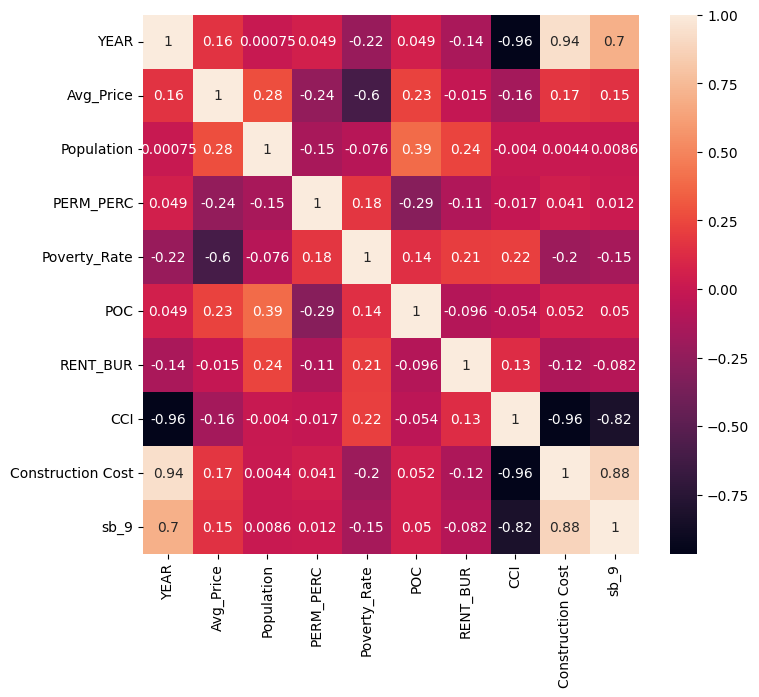

In [ ]:
corrmat = numeric_df.corr()
plt.figure(figsize=(8,7))
g = sns.heatmap(corrmat, annot=True)

### Splitting Dataset

In the following code, we split our **numeric_df** into two parts: The **X** variable contains all the columns from **numeric_df** except for "YEAR" and "PERM_PERC", and the **y** variable contains only the "PERM_PERC" column. This will allow us to build a model using the features in X to predict the PERM_PERC. Again, PERM_PERC is the number of permits in a county normalized by the population of the county and expressed as a percentage.

In [ ]:
X = numeric_df.drop(["YEAR", "PERM_PERC"], axis= 1)
y = numeric_df["PERM_PERC"]

Then we scaled our features in X so that they could have zero mean and unit variance, to hopefully improve the performance of our model!

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

We chose to split our data into three parts to be used for training, validation, and testing for our model:
- The training set was used to train the model
- The validation set was used to tune the model hyperparameters and assess its performance
- The testing set was used to evaluate the final performance of the model on unseen data.

Our *train_test_split (X, y, train_size=0.80, test_size=0.20)*
splits the features X and the target y into a training set and a testing set, with 80% of the data used for training and 20% used for testing. The function returns four values: X_train, X_test, y_train, and y_test.

The *train_test_split(X_train, y_train, train_size=0.75, test_size=0.25)* further splits the training data (X_train and y_train) into a training set and a validation set, with 75% of the data used for training and 25% used for validation. The function returns four values: X_train, X_validate, y_train, and y_validate.

Splitting to get training, validation and testing helps to ensure that the model is not overfitting to the training data and will generalize well to new data.

In [ ]:
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20)

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)


Proceeding with the regression model, we will train with the same hyperparemeters on a dataset that includes the "sb_9" feature. This feature is an indictor of whether the data point occurred before or after SB-9 went into effect (i.e. rows from 2018-2021 and rows from 2022). By comparing this model with the original, we can determine if the SB-9 indicator is an important feature. If it is, this would suggest an association between the enactment of SB-9 and the number of new development applications. Furthermore, as we included many control variables, this will potentially inform us about the effect of SB-9 compared to the effect of other changes, such as housing prices and mortgage rates.

### Data Modelling

#### Model Choices
1. Ridge Regression: Similar to simple linear regression but wih L2 regularization, ridge regression provides better results for multicollinear data as it prevents feature coefficients from growing too large. As we do have some features that are correlated with each other, this model is a suitable choice and should be slighly better than simple linear regression.
2. Random Forest Regression: This ensemble method takes sub-samples of the data and creates a number of random decision tree estimators, before averaging the results to generate a prediction.

*We will go more in depth about our model choice in the following sections:*

#### Naive Model
First, we will test a naive model that simply predicts the mean permit percentage to establish a baseline for the RMSE. Because the dummy model simply predicts the mean of the permit percentages for every input, it should not perform well. The RMSE values for the training and validation sets indicate the average difference between the predicted PERM_PERC values and the actual PERM_PERC values.

In [ ]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

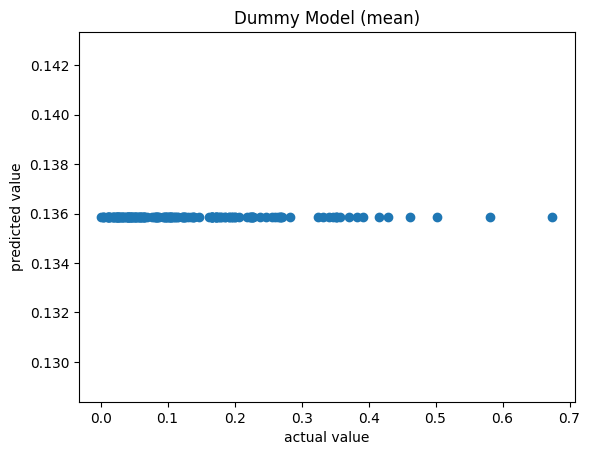

Training RMSE: 0.12026337653627844
Validation RMSE: 0.149814157132349


In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)

dummy_train_pred = dummy_regr.predict(X_train)
dummy_val_pred = dummy_regr.predict(X_validate)

dummy_train_error = rmse(dummy_train_pred, y_train)
dummy_val_error = rmse(dummy_val_pred, y_validate)

plt.scatter(y_train, dummy_train_pred)
plt.title('Dummy Model (mean)')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()
print("Training RMSE:", dummy_train_error)
print("Validation RMSE:", dummy_val_error)

Based on these results: the training RMSE is around .12 and the validation RMSE is around .15, we get what we would expect to see- the dummy model is performing poorly on both the training and validation sets. The RMSE values are relatively high, which means that the predicted values are far from the actual values on average. We also see that the validation RMSE is higher than the training RMSE, suggesting that the model may be overfitting the training data. Overall, these results show that the dummy model is a poor predictor for this dataset, and we should continue to improve the performance of our actual model.

#### Linear Regression and Ridge Regression
Then, we will perform the Ridge Regression, as well as Linear Regression to determine if regularization made a difference. As shown, the performance did not change significantly.

In [ ]:
lin_reg = LinearRegression()

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

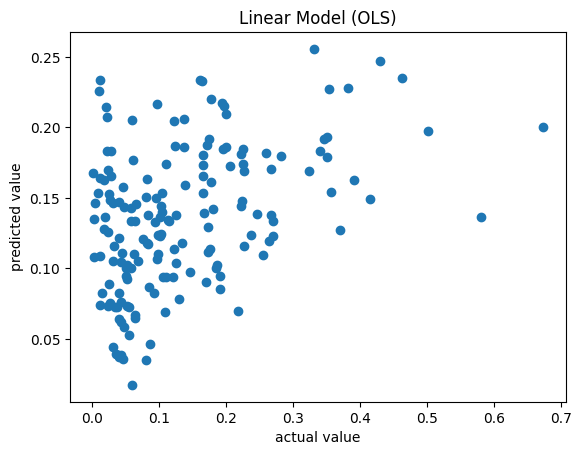

In [ ]:
# predict the permit %
lin_pred = lin_model.predict(X_train)
lin_pred_val = lin_model.predict(X_validate)

# plot the residuals on a scatter plot
plt.scatter(y_train, lin_pred)
plt.title('Linear Model (OLS)')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [ ]:
for col, coef in zip(X_train.columns, lin_model.coef_):
    print(col, ':', coef)

train_r2 = r2_score(y_train, lin_pred)
val_r2 = r2_score(y_validate, lin_pred_val)

print("")

print("Training RMSE", rmse(lin_pred, y_train))
print("Validation RMSE", rmse(lin_pred_val, y_validate))
print("")

print("Training R-squared:", train_r2)
print("Validation R-squared:", val_r2)

Avg_Price : -0.007304176336635492
Population : 0.006619364178313016
Poverty_Rate : 0.02878446998855115
POC : -0.04122851480119253
RENT_BUR : -0.016590808289147593
CCI : 0.032453234449793575
Construction Cost : 0.04425651627683764
sb_9 : 0.007196535880245519

Training RMSE 0.10898684116994481
Validation RMSE 0.1316543219116107

Training R-squared: 0.17873872558006298
Validation R-squared: 0.22554847040623116


Again, even in this model we see that the RMSE is about 0.11 for training and 0.13 for validation, indicating that the model has some error in predicting permit percentage. I also wanted to show the coefficients. From these results, we see that the strongest positive coefficient is for "Construction Cost," indicating that as the cost of construction increases, the permit percentage increases. The strongest negative coefficient is for "POC," indicating that as the percentage of people of color in a neighborhood increases, the permit percentage decreases. We also see that based on the r-squared values, the model explains about 18% of the variance in the training data and about 23% in the validation data.

#### Ridge Regression

Next we ran our Ridge Regression model:
we used this model to determine if adding regularization made a difference in performance compared to the linear regression model. Since Ridge modeling adds a penalty term (when solving the minimzation cost function), we hoped the penalty term could prevent the model from becoming too complex and fitting the noise in the training data. However, maybe our dataset was actually relatively simple- this is possibly why adding in Ridge regression did not have significant improvements in the performance of our model.

In [ ]:
# make and fit a Ridge regression model
ridge_reg = Ridge()
ridge_model = ridge_reg.fit(X_train, y_train)

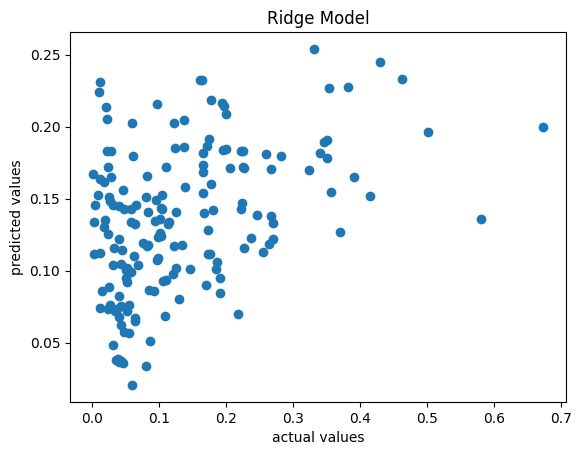

In [ ]:
# use the model to make predictions
ridge_pred = ridge_model.predict(X_train)
ridge_pred_val = ridge_model.predict(X_validate)
ridge_pred_test = ridge_model.predict(X_test)

# plot the predictions
plt.scatter(y_train, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [ ]:
for col, coef in zip(X_train.columns, ridge_model.coef_):
    print(col, ':', coef)

print ("")

r_train_r2 = r2_score(y_train, ridge_pred)
r_val_r2 = r2_score(y_validate, ridge_pred_val)

print("Training RMSE", rmse(ridge_pred, y_train))
print("Validation RMSE", rmse(ridge_pred_val, y_validate))
print("Test RMSE", rmse(ridge_pred_test, y_test))

print ("")

print("Training R-squared:", r_train_r2)
print("Validation R-squared:", r_val_r2)

Avg_Price : -0.007492367476872129
Population : 0.006281658285632178
Poverty_Rate : 0.028437333366933087
POC : -0.04056398412181819
RENT_BUR : -0.016232007990641763
CCI : 0.02649946379016953
Construction Cost : 0.03694453359644234
sb_9 : 0.008619285266966908

Training RMSE 0.10899937498706655
Validation RMSE 0.1317009864634125
Test RMSE 0.1970900487320457

Training R-squared: 0.17854981964598293
Validation R-squared: 0.22499936821554412


The results of our analysis showed that there was not a significant difference in the performance of the two models. The Training and Validation RMSEs were very similar to the RMSEs in our regular Linear Regression model.

Overall, we believed that both of these models were simple enough to interpret clearly, and were well-suited to regression problems with multiple independent variables.

Since Ridge regression did not have much of an improvement on our model, we also decided to run a random forest regression.


#### Random Forest Regression
Finally, we arrive at the random forest model. The random forest provided an improvement in RMSE over linear and ridge regression. The residual graph is also more consistent, though, it also tends to underpredict higher actual values, similar to the previous models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=200, random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)
rf_pred_train = regressor.predict(X_train)
rf_pred_val = regressor.predict(X_validate)
rf_pred_test = regressor.predict(X_test)


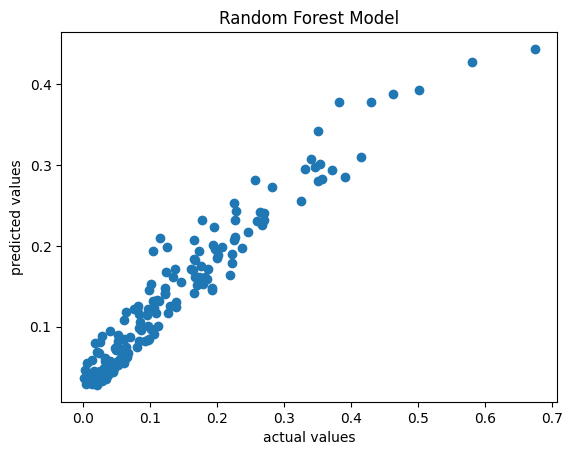

Training RMSE 0.040072825094816786
Validation RMSE 0.11862112991161265
Test RMSE 0.18168758357759404

Training R-squared: 0.8889718417674572
Validation R-squared: 0.3712932634798397


In [ ]:

plt.scatter(y_train, rf_pred_train)
plt.title('Random Forest Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_val_r2 = r2_score(y_validate, rf_pred_val)

print("Training RMSE", rmse(rf_pred_train, y_train))
print("Validation RMSE", rmse(rf_pred_val, y_validate))
print("Test RMSE", rmse(rf_pred_test, y_test))
print ("")

print("Training R-squared:", rf_train_r2)
print("Validation R-squared:", rf_val_r2)

Here we see that our training RMSE is 0.0399, the validation RMSE is 0.1193, and the test RMSE is 0.1817. From these values, it seems like our model is overfitting the training data since the training RMSE is lower than the validation RMSE and test RMSE. It's possible our model will not generalize as well to new data outside of the training set.

### Cross Validation

In efforts to get better results, we will now use grid search with cross validation to tune hyperparemeters. This yielded a very small decrease in RMSE using the best parameters found.

In [ ]:
## Define Grid
grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'n_estimators': [100, 200, 300, 400]
}
## Grid Search function
CV = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'n_estimators': [100, 200, 300, 400]})

In [ ]:
CV.best_params_

{'criterion': 'absolute_error', 'n_estimators': 200}

The best hyperparameters found by the Grid Search function for the Random Forest Regressor were: 'criterion': 'friedman_mse', 'n_estimators': 100. 'friedman_mse', is a mean squared error with Friedman's test statistic and the number of trees in the forest is 100.

In [ ]:
CV_pred_train = CV.predict(X_train)
CV_pred_val = CV.predict(X_validate)
CV_pred_test = CV.predict(X_test)
print("Training RMSE", rmse(CV_pred_train, y_train))
print("Validation RMSE", rmse(CV_pred_val, y_validate))
print("Test RMSE", rmse(CV_pred_test, y_test))

Training RMSE 0.03721845399785753
Validation RMSE 0.12076158923097237
Test RMSE 0.1810100514930989


### Feature Importances
The built-in feature importances (using Gini importances) reveals that SB-9 was the least important feature out of all of our inputs. This means that the SB-9 indicator is not a good estimator and suggests that it has little association with the number of housing developments.

In [ ]:
for i in zip(regressor.feature_names_in_, regressor.feature_importances_):
  print("Gini Importance of " + i[0] + " feature: " + str(i[1]))

Gini Importance of Avg_Price feature: 0.19103220459605444
Gini Importance of Population feature: 0.16478728656368183
Gini Importance of Poverty_Rate feature: 0.1528218982154963
Gini Importance of POC feature: 0.30305279979461847
Gini Importance of RENT_BUR feature: 0.12977442085722668
Gini Importance of CCI feature: 0.025385669961803428
Gini Importance of Construction Cost feature: 0.024812373138478318
Gini Importance of sb_9 feature: 0.008333346872640512


### Removing SB-9 as a feature
Now, we will build a random forest regressor with the same initial parameters, but eliminating the SB-9 column.

In [ ]:
X_train_2 = X_train.drop(["sb_9"], axis=1)
X_validate_2 = X_validate.drop(["sb_9"], axis=1)
X_test_2 = X_test.drop(["sb_9"], axis=1)

In [ ]:
# create regressor object
regressor = RandomForestRegressor(n_estimators=200, random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train_2, y_train)
rf_pred_train = regressor.predict(X_train_2)
rf_pred_val = regressor.predict(X_validate_2)
rf_pred_test = regressor.predict(X_test_2)

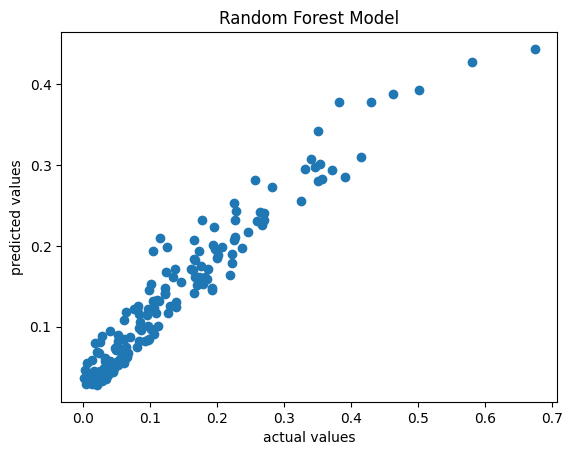

Training RMSE 0.040072825094816786
Validation RMSE 0.11862112991161265
Test RMSE 0.18168758357759404

Training R-squared: 0.8889718417674572
Validation R-squared: 0.3712932634798397


In [ ]:
plt.scatter(y_train, rf_pred_train)
plt.title('Random Forest Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_val_r2 = r2_score(y_validate, rf_pred_val)

print("Training RMSE", rmse(rf_pred_train, y_train))
print("Validation RMSE", rmse(rf_pred_val, y_validate))
print("Test RMSE", rmse(rf_pred_test, y_test))
print ("")

print("Training R-squared:", rf_train_r2)
print("Validation R-squared:", rf_val_r2)

Stated again, our random forest RMSE results were:

* Training RMSE: 0.040102286753545345
* Validation RMSE: 0.11845968318914885
* Test RMSE: 0.1825366849301471

Compared to the previous Random Forest model, dropping the sb_9 feature resulted in a slight increase in the training RMSE, but a decrease in both the validation and test RMSE values. This tells us that removing the sb_9 feature may have resulted in a more generalizable model that performs better on new data. However, it's important to note that the difference in RMSE values between the two models is relatively small.

Still, it seems that our random forest models and our linear and ridge regression models have similar results. SB-9, throughout all models, was not a strong predictor of the number of new permits being generated. With the capacity we had, we did the best we could to include the variables that we believe would be important for our model. We chose the variables we did to try to account for and avoid confounding variables. We also felt it was extremeley important to look at the amount of housing permits generated each year and look at pre-post with SB-9 implementation. A possible limitation in our results are that:

- We do not have enough data from the time period after the implementation of SB-9. Our data analysis only reaches to 2021, so we have not had much time to fully see the effects of SB-9. It is difficult to make definitive conclusions about the effects of the policy on permit creation.
- It is also important to note that different cities could have had different implementations of SB-9. For example, based on our preliminary research/readings we saw that the City of Los Angeles facilitated the use of SB-9 more than other cities. It would be interesting to maybe look at city-to-city comparisons, although it would be difficult since all cities in CA were at least in some way impacted by SB-9.
- It might also be interesting to look at the effect of different policies on Accessible Dwelling Unit Housing creation. It could also be interesting to use variables such as rent-burden in a city as a predictor for the generation of different types of housing (such as ADUs). Although our results do not show that SB-9 has strong implications, it would be interesting to explore similar policies such as SB-35 or the effect of varied implementation across ciites.

## Conclusion

  It is clear that the model without the SB-9 indicator performed very similarly to the model with the indicator. Therefore, the control features were much more important predictors than SB-9, indicating its lack of impact on the number of housing permits. Had SB-9 had a more significant effect on the rate of housing development applications, we would have expected a larger difference in the quality of the two models. However, our random forest model results showed that the SB-9 indicator had the lowest Gini importance (mean decrease in impurity) of all the features. From this, we conclude that SB-9 did not have an effect on the number of housing applications when controlling for major socioeconomic variables.

 Our findings lead us to believe that policy makers should consider why policies like SB-9 were not as feasible or applicable as they hoped. According to an article by the Terner Center*, who had access to SB-9 specific data, the number of applications submitted to SB-9 were very low. This was possibly due to local regualtions "such as low maximum unit size, height limitations, and other design rules" that disencentived people to build under SB-9.

 Possibly addressing some of these local regulations, and exploring why so many people are deciding to build ADUs (accessory building units) instead of utilizing SB-9 could be crucial.

 Future research could focus on how local building regulations interact with the creation of new housing permits. Research could also explore the factors behind the cities who actually recorded a significant number of SB-9 permits: what made SB-9 more effective in these cities and is there something we can learn from these examples?

 All in all, analyzing a policy that did not have the intended effect is hugely important- it tells us to explore where the policy went wrong and how we can move forward so that more people can take advantage of it and help create more housing.

**cited in introduction*